# Task 3:  Classify Wine Quality And Wine Type  

### Task 3 Comprises of:
#### Experiment 1 : Classifying Wine Quality - Basic Neural Network
#### Experiment 2 : Classifying WIne Quality - Deep Neural Network
#### Experiment 3: Predict Wine Quality As A Regression Task
#### Experiment 4 : Classifying WIne Type

### Wine Quality And WIne Type Classification

The wine quality data set is from UCI Machine Learning Respository. 

White Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold



In [72]:
whiteWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
redWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

### Exploratory Data Analysis

In [73]:
print('whiteWine :\n')
print( whiteWine.info())
print('redWine :\n')
print(redWine.info())

whiteWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
redWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 

From observation, there are less redWine samples compared to whiteWine samples.  

In [74]:
display(redWine.head(), whiteWine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
#a function to simplify analysis of data

def dataDescribe(df):
    dfShape=df.shape
    dfInfo=df.info()
    dfTypes=df.dtypes #type of data
    dfCounts=df.apply(lambda x:x.count()) #number of sample instances
    dfNulls=df.apply(lambda x:x.isnull().sum())
    dfDistincts=df.apply(lambda x:x.unique().shape[0]) #number of distinct value for each column
    dfMax=df.apply(lambda x:x.max())
    dfMin=df.apply(lambda x:x.min())
    dfSkew=df.skew()
    dfKurtosis=df.kurt()
    
    cols=['types','count','null_entry', 'distict_value','max_value', 'min_value', 'skew','kurtosis']
    
    dfDescribe=pd.concat([dfTypes,dfCounts,dfNulls,dfDistincts,dfMax,dfMin,dfSkew,dfKurtosis],axis=1)
    
    dfDescribe.columns=cols
    
    print('Shape :', dfShape)
    print('Info :',dfInfo)
    return dfDescribe

#redWine.apply(lambda x:x.unique().shape[0])
#redWine.apply(lambda x:x.count())
#redWine.apply(lambda x:x.max())
#redWine.apply(lambda x:x.min())
#redWine.apply(lambda x:x.isnull().sum())

In [76]:
redWineDetails=dataDescribe(redWine)
display(redWineDetails)
whiteWineDetails=dataDescribe(whiteWine)
display(whiteWineDetails)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape : (1599, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,1599,0,96,15.90000,4.60000,0.982751,1.132143
volatile acidity,float64,1599,0,143,1.58000,0.12000,0.671593,1.225542
citric acid,float64,1599,0,80,1.00000,0.00000,0.318337,-0.788998
residual sugar,float64,1599,0,91,15.50000,0.90000,4.540655,28.617595
chlorides,float64,1599,0,153,0.61100,0.01200,5.680347,41.715787
free sulfur dioxide,float64,1599,0,60,72.00000,1.00000,1.250567,2.023562
total sulfur dioxide,float64,1599,0,144,289.00000,6.00000,1.515531,3.809824
density,float64,1599,0,436,1.00369,0.99007,0.071288,0.934079
pH,float64,1599,0,89,4.01000,2.74000,0.193683,0.806943
sulphates,float64,1599,0,96,2.00000,0.33000,2.428672,11.720251


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Shape : (4898, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,4898,0,68,14.20000,3.80000,0.647751,2.172178
volatile acidity,float64,4898,0,125,1.10000,0.08000,1.576980,5.091626
citric acid,float64,4898,0,87,1.66000,0.00000,1.281920,6.174901
residual sugar,float64,4898,0,310,65.80000,0.60000,1.077094,3.469820
chlorides,float64,4898,0,160,0.34600,0.00900,5.023331,37.564600
free sulfur dioxide,float64,4898,0,132,289.00000,2.00000,1.406745,11.466342
total sulfur dioxide,float64,4898,0,251,440.00000,9.00000,0.390710,0.571853
density,float64,4898,0,890,1.03898,0.98711,0.977773,9.793807
pH,float64,4898,0,103,3.82000,2.72000,0.457783,0.530775
sulphates,float64,4898,0,79,1.08000,0.22000,0.977194,1.590930


#### Both red wine and white wine dataset has no missing information. 

(acceptable range for being normally distributed for kurtosis is (-2,2), and for skewness is (-1,1))

* The following attributes of the White Wine are highly positve skewed:
  * volatile acidity, citric acid, chlorides, free sulphur dioxide, quality
* The following attributes of Red Wine are highly positve skewed:
  * residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates

The following attributes of White Wine have high kurtosis:
  * fixed acidity, volatile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, density
 
The following attributes of Red Wine havd high kurtosis:
  * residual sugar, chlorides, total sulphur dioxide, sulphates

### Visualizing The Data

In [77]:
def plotChart(redWine,whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title):
        fig, ax = plt.subplots(1, 2)

        ax[0].hist(redWine[chemical], 10, facecolor='red')


        ax[1].hist(whiteWine[chemical],10, facecolor='white', ec="black", lw=1)


        #ax[0].set_ylim([0, max(redWine[chemical].value_counts().max(),whiteWine[chemical].value_counts().max())])
        fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)
        ax[0].set_xlabel(xLabelRed)
        ax[0].set_ylabel(yLabel)
        ax[1].set_xlabel(xLabelWhite)
        ax[1].set_ylabel(yLabel)
        fig.suptitle(title)

        plt.show()


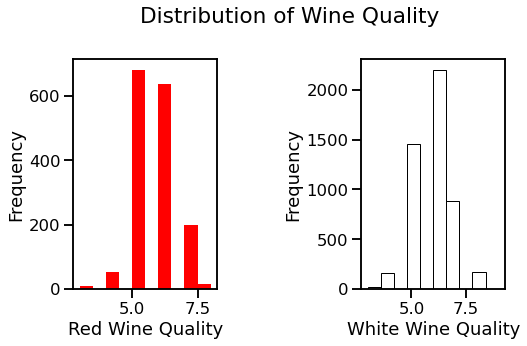

In [78]:
chemical='quality'
xLabelRed="Red Wine Quality"
xLabelWhite="White Wine Quality"
yLabel="Frequency"
title="Distribution of Wine Quality"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )



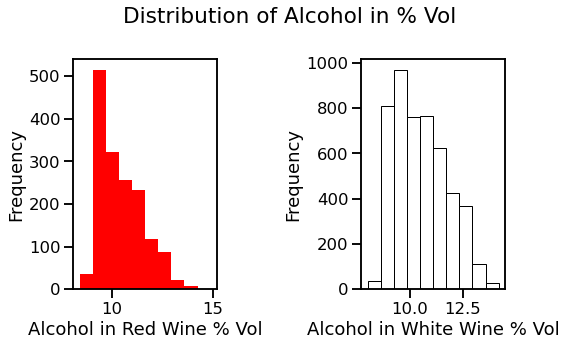

In [79]:
#Understanding Alcohol 

chemical='alcohol'
xLabelRed="Alcohol in Red Wine % Vol"
xLabelWhite="Alcohol in White Wine % Vol"
yLabel="Frequency"
title="Distribution of Alcohol in % Vol"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )


As can be observed in the chart above, alcohol levels for both red and white wine are mostly around 9-10%. Very few wines are above 14% in alcohol. 

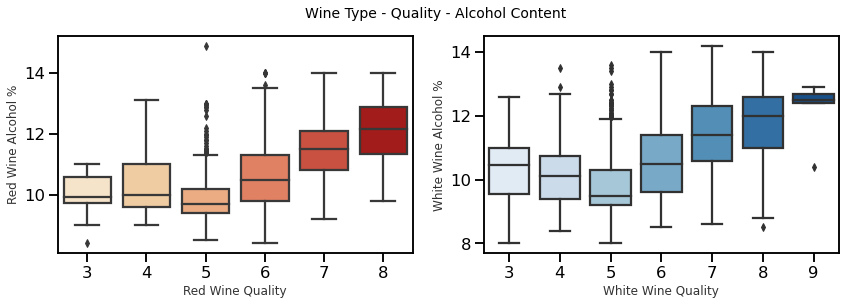

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol',ax=ax1, data=redWine, palette='OrRd')


ax1.set_xlabel("Red Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Red Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x='quality', y='alcohol', data=whiteWine, ax=ax2, palette='Blues')

ax2.set_xlabel("White Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("White Wine Alcohol %",size = 12,alpha=0.8)
plt.show()


From the chart above, it can be obseved that mean alcohol levels are higher for better wine quality rating for both red or white wine. However for average wine quality, outliers in alcohol level can be observed. Perhaps it is harder to discern average wine based on alcohol level.  

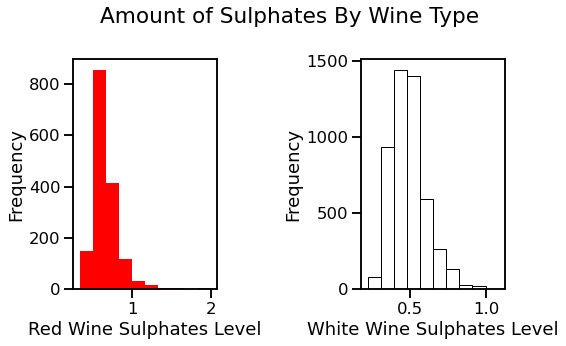

In [81]:
chemical='sulphates'
xLabelRed="Red Wine Sulphates Level"
xLabelWhite="White Wine Sulphates Level"
yLabel="Frequency"
title="Amount of Sulphates By Wine Type"

plotChart(redWine, whiteWine,chemical, xLabelRed,xLabelWhite,yLabel,title )




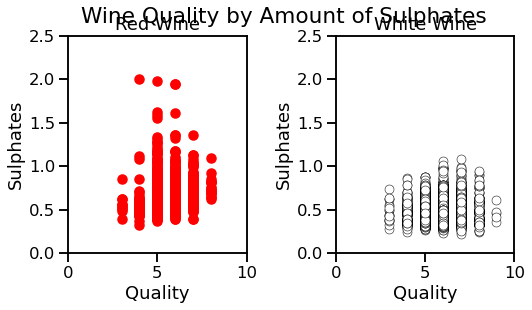

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(redWine['quality'], redWine["sulphates"], color="red")
ax[1].scatter(whiteWine['quality'], whiteWine['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Suplhates are related to the fermentation process of wine and affects the aroma and flavor. However, sulphates has been reported to cause headaches in females more often than males. 

As can be observed from the charts, red wine generally has higher levels of sulphates compared to white wine. 

From the scatter plot, higher quality red and white wines have lower levels of sulphates. 

In [83]:
subset_attributes = redWine.columns
print(subset_attributes)
rs = round(redWine.loc[:, subset_attributes].describe(),2)
#print(rs)
ws = round(whiteWine.loc[:, subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

#### Comments From Descriptive Statistics Above:
* Red wine has highter mean values of fixed acidity, volatile acidity and sulphates compared to white wine.
* White wine has higher mean values of residual sugar, free sulphur dioxide, total sulphur dioxide than red wine.
* Alcohol content does not give much variation to distiguish between White and Red Wine. 


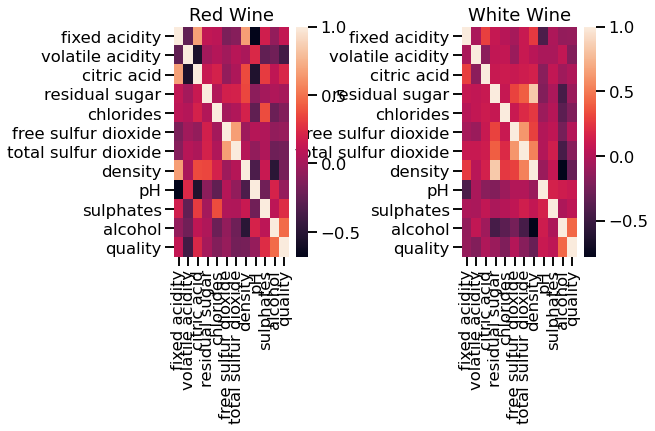

In [84]:
fig,ax=plt.subplots(1,2)


sns.heatmap(redWine.corr(), xticklabels=redWine.corr().columns.values, yticklabels=redWine.corr().columns.values, ax=ax[0])
ax[0].set_title('Red Wine')
sns.heatmap(whiteWine.corr(), xticklabels=whiteWine.corr().columns.values, yticklabels=whiteWine.corr().columns.values, ax=ax[1])
ax[1].set_title('White Wine')
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)

plt.show()

#### Comments on Correlations 
* For White Wine, density has relatively high positive correlation with residual sugar, and high negative correlation with alcohol. 
* For Red Wine, alcohol has high positive correlation with quality, and strong negative correlation between density and alcohol level. 
* Generally, free sulphur dioxide and total sulphur dioxide tend to positively correlate. Volatile acidity and citric acid tend to negatively correlate. 

From wine literature, density is generally used as measure of conversion of sugar to alcohol.  So in the case of white wine, the high positive correlation between density and residual sugar and negative correlation with alcohol makes sense as it reflects more conversion of sugar to alcohol. 


### Preprocess Data

This project will be predicting: 
* whether wine sample is red or white wine
* Quality of wine sample

The plan also include trying functional api with two inputs and two outputs for predicting both wine quality and wine type. 

In [85]:
redWine['type']=1
whiteWine['type']=0
wines=redWine.append(whiteWine, ignore_index=True)

In [86]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Create class labels for the wine quality score. 
this is because wine quality score for red wine does not have score 0,1,2,9 and 10.
this missing target label supply no information on what constitutes quality score of 1,2,9 and 10.

hence any multi-class or regression prediction using the original wine quality score will not be able to predict
wine quality score0,1,2,9, and 10.

A better approach is to group quality score into bands as low, average, good. 
3,4- low. 5,6 - average, 7,8 good

Set 'low':0, 'average':1,'good':2

In [87]:
wines['quality_class']=wines.quality.apply(lambda x: 0 if x<5 else 2 if x>6 else 1) 
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


In [88]:
wines['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [89]:
wines['quality_class'].value_counts()

1    4974
2    1277
0     246
Name: quality_class, dtype: int64

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


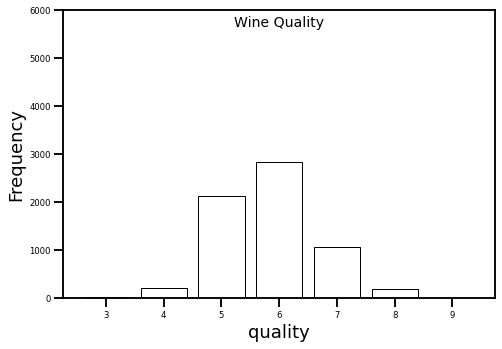

1    4974
2    1277
0     246
Name: quality_class, dtype: int64


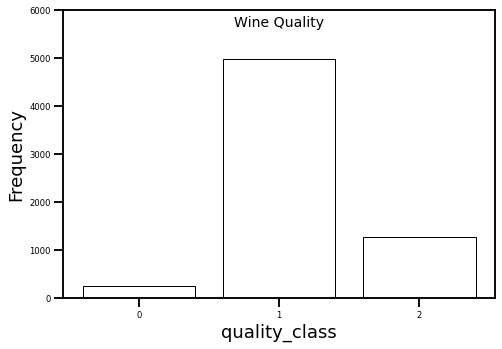

In [90]:
def plot_winequality(col_selected):
    
    if col_selected=='quality':
        print(wines['quality'].value_counts())
    else:
        print(wines['quality_class'].value_counts())
        
    fig=plt.figure(figsize=(6,4))
    ax= fig.add_axes([0,0,1,1])

    title = fig.suptitle("Wine Quality", fontsize=14)
    #ax.set_title("Combined Wine Quality")
    ax.set_xlabel(col_selected)
    ax.set_ylabel("Frequency") 

    w_q = wines[col_selected].value_counts().sort_index()
    w_q = (list(w_q.index), list(w_q.values))
    ax.set_ylim([0, 6000])
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    ax.bar(list(range(len(w_q[0]))), w_q[1], color='white', 
                   edgecolor='black', linewidth=1, tick_label =w_q[0])

    plt.show()
plot_winequality('quality')
plot_winequality('quality_class')

Although the wine reviewers are allowed to rate wine quality between 0 to 10, in the dataset, there is no rating for 0,1,2 and 10. It is also very clear that based on distribution of wine quality, there are more 'average' wines compared to good or low quality wines. 

This is highly imbalanced dataset. 

In previous two parts of this project, the approach was to look at predicting wine quality as a class labels. This was also the approach when using traditional machine learning as a baseline for comparision. 

But there are two ways to look at the task. One is what was done previously. The other was to look at quality variable as a continous variable between the range of 0 and 10. The task then is a ordinal regression task. It's a type of regression where the relative ordering of the value between the different quality values is significant. 

To stay coherent to prior parts of the project, we will continue to treat wine quality as class labels. And later, add on a separate approach of looking at quality values as continous variables. 

#### Quality Values as Class Labels (after tranformation).

In [91]:
X=wines.drop(['quality','quality_class'], axis=1)
y=wines['quality_class']

In [92]:
display(X.head(), y.head())
display(X.shape, y.shape)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


0    1
1    1
2    1
3    1
4    1
Name: quality_class, dtype: int64

(6497, 12)

(6497,)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
display(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(5197, 12)

(1300, 12)

(5197,)

(1300,)

#### Preprocess the data


#### Standarization of th data
It has been observed during data exploration that range of max and min values for each attributes are sometimes several magnitudes difference. 

Therefore, standarization is required for the data. StanardScaler is selected as it deals better with outliers. 

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


### Imbalance Data - Red wine and White Wine.
---deal with this. 
### SMOTE For Balancing Data
There is a problem with imbalanced classification because the minority class, in this case Red Wine,is outnumbered by almost three times (4898 white wine samples vs 1599 red wine samples). 

THe approach to solve this problem is to oversample the examples in the minority class. This can be achieved by synthesizing new examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional indormation to the model. 

The technique used here is called Synthetic Minority Oversampling Technique (SMOTE). 


<AxesSubplot:xlabel='quality_class', ylabel='count'>

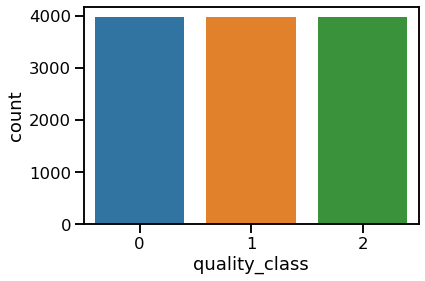

In [96]:
from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.
oversample=SMOTE(random_state=42)
X_smote_train,y_smote_train=oversample.fit_resample(X_train,y_train)

sns.countplot(x=y_smote_train)

In [97]:
display(X_smote_train[0:5], X_smote_train.shape)

array([[-0.46822898, -0.59951186,  0.20546655,  0.4646116 , -0.71280142,
         0.31165933,  0.34356569, -0.29614553, -0.16888369, -1.0832659 ,
         0.01376574, -0.56512866],
       [ 0.85149992, -0.35284877,  1.10406349, -0.70299854,  1.06747   ,
        -1.4087346 , -1.84751841, -0.20307163,  0.26967864,  0.59857677,
         1.60871671,  1.76950857],
       [ 0.38571325,  2.32961232, -2.14471006, -0.70299854,  0.2347624 ,
         0.02492701, -1.29529396, -0.32606213,  1.20945505,  0.26220824,
         1.10504798,  1.76950857],
       [-1.55506455,  0.20214318,  0.06722087, -0.89065017, -0.79894359,
        -1.00730935, -0.61837367, -1.49280991,  0.958848  , -1.01599219,
         1.0211032 , -0.56512866],
       [-0.46822898, -0.47618032,  1.65704622,  2.07007555, -0.0810922 ,
         0.08227347,  0.45044784,  1.1332036 , -0.67009777, -0.27598142,
        -0.99357172, -0.56512866]])

(11925, 12)

## Experment 1: Classify Wine Quality - Basic Neural Network



In [98]:
%%time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential

epoch_set=200
seed = 42
history=[]
m=None

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    model = Sequential()
    model.add(Dense(20, input_dim=12, activation='relu',name="Wine_Quality"))
    model.add(Dense(3,activation='softmax', name='Output_Layer'))
    
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    m=model
    h=(model.fit(X_smote_train[train,:], y_smote_train[train],
                 validation_data=(X_smote_train[test,:],y_smote_train[test]), 
                 epochs=epoch_set, verbose=1))
    history.append(h)

Epoch 1/100
299/299 [==============================] - 0s 866us/step - loss: 0.7505 - sparse_categorical_accuracy: 0.6562 - val_loss: 0.7064 - val_sparse_categorical_accuracy: 0.6893
Epoch 2/100
299/299 [==============================] - 0s 649us/step - loss: 0.6786 - sparse_categorical_accuracy: 0.7002 - val_loss: 0.6827 - val_sparse_categorical_accuracy: 0.6935
Epoch 3/100
299/299 [==============================] - 0s 619us/step - loss: 0.6558 - sparse_categorical_accuracy: 0.7151 - val_loss: 0.6592 - val_sparse_categorical_accuracy: 0.7086
Epoch 4/100
299/299 [==============================] - 0s 624us/step - loss: 0.6373 - sparse_categorical_accuracy: 0.7276 - val_loss: 0.6408 - val_sparse_categorical_accuracy: 0.7170
Epoch 5/100
299/299 [==============================] - 0s 656us/step - loss: 0.6163 - sparse_categorical_accuracy: 0.7352 - val_loss: 0.6270 - val_sparse_categorical_accuracy: 0.7115
Epoch 6/100
299/299 [==============================] - 0s 627us/step - loss: 0.6074 -

299/299 [==============================] - 0s 696us/step - loss: 0.5282 - sparse_categorical_accuracy: 0.7768 - val_loss: 0.5640 - val_sparse_categorical_accuracy: 0.7488
Epoch 46/100
299/299 [==============================] - 0s 626us/step - loss: 0.5290 - sparse_categorical_accuracy: 0.7785 - val_loss: 0.5775 - val_sparse_categorical_accuracy: 0.7447
Epoch 47/100
299/299 [==============================] - 0s 662us/step - loss: 0.5266 - sparse_categorical_accuracy: 0.7788 - val_loss: 0.5625 - val_sparse_categorical_accuracy: 0.7614
Epoch 48/100
299/299 [==============================] - 0s 628us/step - loss: 0.5240 - sparse_categorical_accuracy: 0.7829 - val_loss: 0.5762 - val_sparse_categorical_accuracy: 0.7493
Epoch 49/100
299/299 [==============================] - 0s 629us/step - loss: 0.5255 - sparse_categorical_accuracy: 0.7800 - val_loss: 0.5668 - val_sparse_categorical_accuracy: 0.7547
Epoch 50/100
299/299 [==============================] - 0s 613us/step - loss: 0.5239 - sparse

299/299 [==============================] - 0s 661us/step - loss: 0.5064 - sparse_categorical_accuracy: 0.7874 - val_loss: 0.5553 - val_sparse_categorical_accuracy: 0.7690
Epoch 90/100
299/299 [==============================] - 0s 641us/step - loss: 0.5047 - sparse_categorical_accuracy: 0.7886 - val_loss: 0.5744 - val_sparse_categorical_accuracy: 0.7681
Epoch 91/100
299/299 [==============================] - 0s 684us/step - loss: 0.5087 - sparse_categorical_accuracy: 0.7907 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.7677
Epoch 92/100
299/299 [==============================] - 0s 647us/step - loss: 0.5056 - sparse_categorical_accuracy: 0.7882 - val_loss: 0.5470 - val_sparse_categorical_accuracy: 0.7748
Epoch 93/100
299/299 [==============================] - 0s 716us/step - loss: 0.5071 - sparse_categorical_accuracy: 0.7834 - val_loss: 0.5767 - val_sparse_categorical_accuracy: 0.7539
Epoch 94/100
299/299 [==============================] - 0s 628us/step - loss: 0.5012 - sparse

Epoch 34/100
299/299 [==============================] - 0s 648us/step - loss: 0.5345 - sparse_categorical_accuracy: 0.7730 - val_loss: 0.5618 - val_sparse_categorical_accuracy: 0.7606
Epoch 35/100
299/299 [==============================] - 0s 695us/step - loss: 0.5389 - sparse_categorical_accuracy: 0.7726 - val_loss: 0.5646 - val_sparse_categorical_accuracy: 0.7597
Epoch 36/100
299/299 [==============================] - 0s 651us/step - loss: 0.5381 - sparse_categorical_accuracy: 0.7726 - val_loss: 0.5512 - val_sparse_categorical_accuracy: 0.7686
Epoch 37/100
299/299 [==============================] - 0s 651us/step - loss: 0.5343 - sparse_categorical_accuracy: 0.7744 - val_loss: 0.5582 - val_sparse_categorical_accuracy: 0.7589
Epoch 38/100
299/299 [==============================] - 0s 692us/step - loss: 0.5349 - sparse_categorical_accuracy: 0.7717 - val_loss: 0.5661 - val_sparse_categorical_accuracy: 0.7660
Epoch 39/100
299/299 [==============================] - 0s 638us/step - loss: 0.

299/299 [==============================] - 0s 638us/step - loss: 0.5213 - sparse_categorical_accuracy: 0.7796 - val_loss: 0.5710 - val_sparse_categorical_accuracy: 0.7505
Epoch 79/100
299/299 [==============================] - 0s 662us/step - loss: 0.5194 - sparse_categorical_accuracy: 0.7848 - val_loss: 0.5583 - val_sparse_categorical_accuracy: 0.7597
Epoch 80/100
299/299 [==============================] - 0s 662us/step - loss: 0.5194 - sparse_categorical_accuracy: 0.7852 - val_loss: 0.5566 - val_sparse_categorical_accuracy: 0.7635
Epoch 81/100
299/299 [==============================] - 0s 662us/step - loss: 0.5202 - sparse_categorical_accuracy: 0.7854 - val_loss: 0.5478 - val_sparse_categorical_accuracy: 0.7597
Epoch 82/100
299/299 [==============================] - 0s 632us/step - loss: 0.5193 - sparse_categorical_accuracy: 0.7834 - val_loss: 0.5355 - val_sparse_categorical_accuracy: 0.7702
Epoch 83/100
299/299 [==============================] - 0s 639us/step - loss: 0.5125 - sparse

Epoch 23/100
299/299 [==============================] - 0s 599us/step - loss: 0.5486 - sparse_categorical_accuracy: 0.7699 - val_loss: 0.5593 - val_sparse_categorical_accuracy: 0.7639
Epoch 24/100
299/299 [==============================] - 0s 637us/step - loss: 0.5511 - sparse_categorical_accuracy: 0.7688 - val_loss: 0.5600 - val_sparse_categorical_accuracy: 0.7698
Epoch 25/100
299/299 [==============================] - 0s 599us/step - loss: 0.5473 - sparse_categorical_accuracy: 0.7683 - val_loss: 0.5628 - val_sparse_categorical_accuracy: 0.7706
Epoch 26/100
299/299 [==============================] - 0s 593us/step - loss: 0.5383 - sparse_categorical_accuracy: 0.7703 - val_loss: 0.5554 - val_sparse_categorical_accuracy: 0.7585
Epoch 27/100
299/299 [==============================] - 0s 605us/step - loss: 0.5428 - sparse_categorical_accuracy: 0.7725 - val_loss: 0.5633 - val_sparse_categorical_accuracy: 0.7597
Epoch 28/100
299/299 [==============================] - 0s 597us/step - loss: 0.

299/299 [==============================] - 0s 623us/step - loss: 0.4961 - sparse_categorical_accuracy: 0.7935 - val_loss: 0.5222 - val_sparse_categorical_accuracy: 0.7958
Epoch 68/100
299/299 [==============================] - 0s 676us/step - loss: 0.4998 - sparse_categorical_accuracy: 0.7945 - val_loss: 0.5185 - val_sparse_categorical_accuracy: 0.7954
Epoch 69/100
299/299 [==============================] - 0s 698us/step - loss: 0.4932 - sparse_categorical_accuracy: 0.8001 - val_loss: 0.5383 - val_sparse_categorical_accuracy: 0.7878
Epoch 70/100
299/299 [==============================] - 0s 650us/step - loss: 0.5001 - sparse_categorical_accuracy: 0.7939 - val_loss: 0.5103 - val_sparse_categorical_accuracy: 0.7975
Epoch 71/100
299/299 [==============================] - 0s 674us/step - loss: 0.4932 - sparse_categorical_accuracy: 0.7932 - val_loss: 0.5141 - val_sparse_categorical_accuracy: 0.7941
Epoch 72/100
299/299 [==============================] - 0s 700us/step - loss: 0.4959 - sparse

Epoch 12/100
299/299 [==============================] - 0s 925us/step - loss: 0.5646 - sparse_categorical_accuracy: 0.7608 - val_loss: 0.6048 - val_sparse_categorical_accuracy: 0.7589
Epoch 13/100
299/299 [==============================] - 0s 897us/step - loss: 0.5654 - sparse_categorical_accuracy: 0.7664 - val_loss: 0.5763 - val_sparse_categorical_accuracy: 0.7589
Epoch 14/100
299/299 [==============================] - 0s 891us/step - loss: 0.5561 - sparse_categorical_accuracy: 0.7652 - val_loss: 0.5876 - val_sparse_categorical_accuracy: 0.7606
Epoch 15/100
299/299 [==============================] - 0s 889us/step - loss: 0.5548 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.5837 - val_sparse_categorical_accuracy: 0.7614
Epoch 16/100
299/299 [==============================] - 0s 889us/step - loss: 0.5523 - sparse_categorical_accuracy: 0.7740 - val_loss: 0.5750 - val_sparse_categorical_accuracy: 0.7677
Epoch 17/100
299/299 [==============================] - 0s 881us/step - loss: 0.

299/299 [==============================] - 0s 1ms/step - loss: 0.5028 - sparse_categorical_accuracy: 0.7901 - val_loss: 0.5399 - val_sparse_categorical_accuracy: 0.7828
Epoch 57/100
299/299 [==============================] - 0s 1ms/step - loss: 0.4988 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.5529 - val_sparse_categorical_accuracy: 0.7706
Epoch 58/100
299/299 [==============================] - 0s 1ms/step - loss: 0.4978 - sparse_categorical_accuracy: 0.7888 - val_loss: 0.5708 - val_sparse_categorical_accuracy: 0.7690
Epoch 59/100
299/299 [==============================] - 0s 1ms/step - loss: 0.4983 - sparse_categorical_accuracy: 0.7894 - val_loss: 0.5532 - val_sparse_categorical_accuracy: 0.7803
Epoch 60/100
299/299 [==============================] - 0s 1ms/step - loss: 0.4973 - sparse_categorical_accuracy: 0.7929 - val_loss: 0.5378 - val_sparse_categorical_accuracy: 0.7790
Epoch 61/100
299/299 [==============================] - 0s 1ms/step - loss: 0.4881 - sparse_categorical

Epoch 1/100
299/299 [==============================] - 0s 1ms/step - loss: 0.7550 - sparse_categorical_accuracy: 0.6555 - val_loss: 0.6918 - val_sparse_categorical_accuracy: 0.7036
Epoch 2/100
299/299 [==============================] - 0s 890us/step - loss: 0.6781 - sparse_categorical_accuracy: 0.7031 - val_loss: 0.6630 - val_sparse_categorical_accuracy: 0.7128
Epoch 3/100
299/299 [==============================] - 0s 877us/step - loss: 0.6545 - sparse_categorical_accuracy: 0.7123 - val_loss: 0.6355 - val_sparse_categorical_accuracy: 0.7384
Epoch 4/100
299/299 [==============================] - 0s 887us/step - loss: 0.6258 - sparse_categorical_accuracy: 0.7231 - val_loss: 0.6173 - val_sparse_categorical_accuracy: 0.7379
Epoch 5/100
299/299 [==============================] - 0s 886us/step - loss: 0.6100 - sparse_categorical_accuracy: 0.7409 - val_loss: 0.6078 - val_sparse_categorical_accuracy: 0.7367
Epoch 6/100
299/299 [==============================] - 0s 884us/step - loss: 0.5982 - s

299/299 [==============================] - 0s 684us/step - loss: 0.5268 - sparse_categorical_accuracy: 0.7813 - val_loss: 0.5407 - val_sparse_categorical_accuracy: 0.7610
Epoch 46/100
299/299 [==============================] - 0s 670us/step - loss: 0.5252 - sparse_categorical_accuracy: 0.7792 - val_loss: 0.5720 - val_sparse_categorical_accuracy: 0.7706
Epoch 47/100
299/299 [==============================] - 0s 678us/step - loss: 0.5208 - sparse_categorical_accuracy: 0.7835 - val_loss: 0.5517 - val_sparse_categorical_accuracy: 0.7694
Epoch 48/100
299/299 [==============================] - 0s 668us/step - loss: 0.5226 - sparse_categorical_accuracy: 0.7779 - val_loss: 0.5457 - val_sparse_categorical_accuracy: 0.7774
Epoch 49/100
299/299 [==============================] - 0s 644us/step - loss: 0.5267 - sparse_categorical_accuracy: 0.7850 - val_loss: 0.5441 - val_sparse_categorical_accuracy: 0.7740
Epoch 50/100
299/299 [==============================] - 0s 637us/step - loss: 0.5229 - sparse

299/299 [==============================] - 0s 624us/step - loss: 0.5083 - sparse_categorical_accuracy: 0.7914 - val_loss: 0.5222 - val_sparse_categorical_accuracy: 0.7748
Epoch 90/100
299/299 [==============================] - 0s 634us/step - loss: 0.5147 - sparse_categorical_accuracy: 0.7838 - val_loss: 0.5391 - val_sparse_categorical_accuracy: 0.7539
Epoch 91/100
299/299 [==============================] - 0s 623us/step - loss: 0.5030 - sparse_categorical_accuracy: 0.7901 - val_loss: 0.5325 - val_sparse_categorical_accuracy: 0.7836
Epoch 92/100
299/299 [==============================] - 0s 632us/step - loss: 0.5038 - sparse_categorical_accuracy: 0.7905 - val_loss: 0.5463 - val_sparse_categorical_accuracy: 0.7786
Epoch 93/100
299/299 [==============================] - 0s 618us/step - loss: 0.5047 - sparse_categorical_accuracy: 0.7877 - val_loss: 0.5365 - val_sparse_categorical_accuracy: 0.7816
Epoch 94/100
299/299 [==============================] - 0s 609us/step - loss: 0.5050 - sparse

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Wine_Quality (Dense)         (None, 20)                260       
_________________________________________________________________
Output_Layer (Dense)         (None, 3)                 63        
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


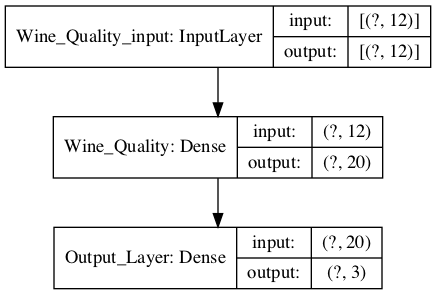

None

In [99]:
display(plot_model(m,show_shapes=True),model.summary())

In [100]:
#to check out how history is structured 

display(history[0].history, history[0].history.keys())

{'loss': [0.7505055665969849,
  0.6785510182380676,
  0.6558456420898438,
  0.6373406648635864,
  0.6163060665130615,
  0.6074365377426147,
  0.5939234495162964,
  0.590533435344696,
  0.5780060291290283,
  0.5824686288833618,
  0.5765817165374756,
  0.5705527663230896,
  0.5655348896980286,
  0.5649497509002686,
  0.5664774179458618,
  0.558158278465271,
  0.5610455870628357,
  0.5547460913658142,
  0.5535619854927063,
  0.554461658000946,
  0.5474673509597778,
  0.5515080690383911,
  0.5431407690048218,
  0.5442888736724854,
  0.5412161350250244,
  0.5422205328941345,
  0.5434586405754089,
  0.5359473824501038,
  0.5399565696716309,
  0.5423860549926758,
  0.5362054109573364,
  0.5398532748222351,
  0.5365745425224304,
  0.5386229753494263,
  0.5283282399177551,
  0.537756085395813,
  0.5330062508583069,
  0.5335615873336792,
  0.5300174951553345,
  0.5318480134010315,
  0.5313846468925476,
  0.5264410972595215,
  0.5319308042526245,
  0.5284838676452637,
  0.5282256603240967,
  0.52

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

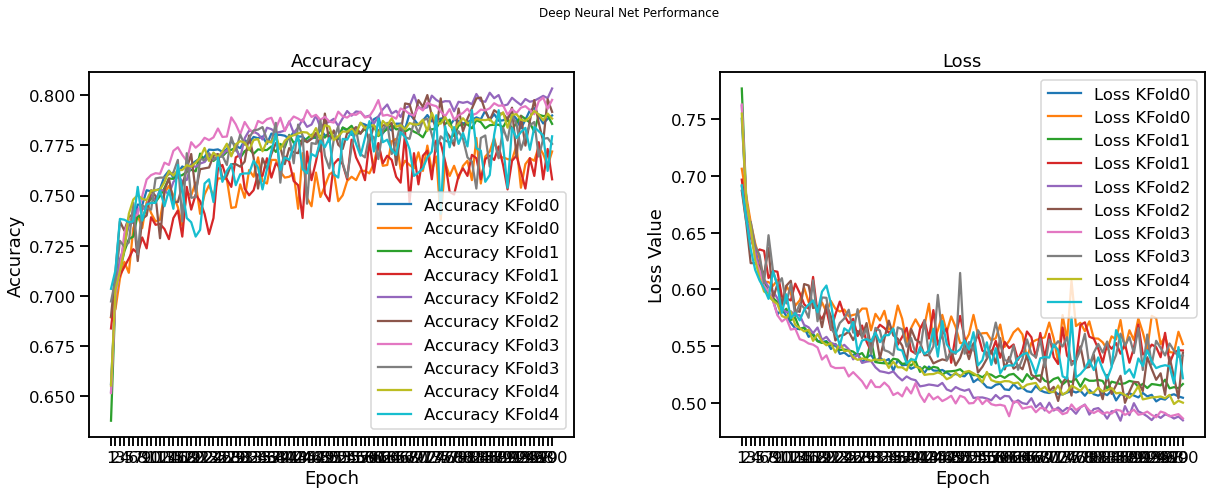

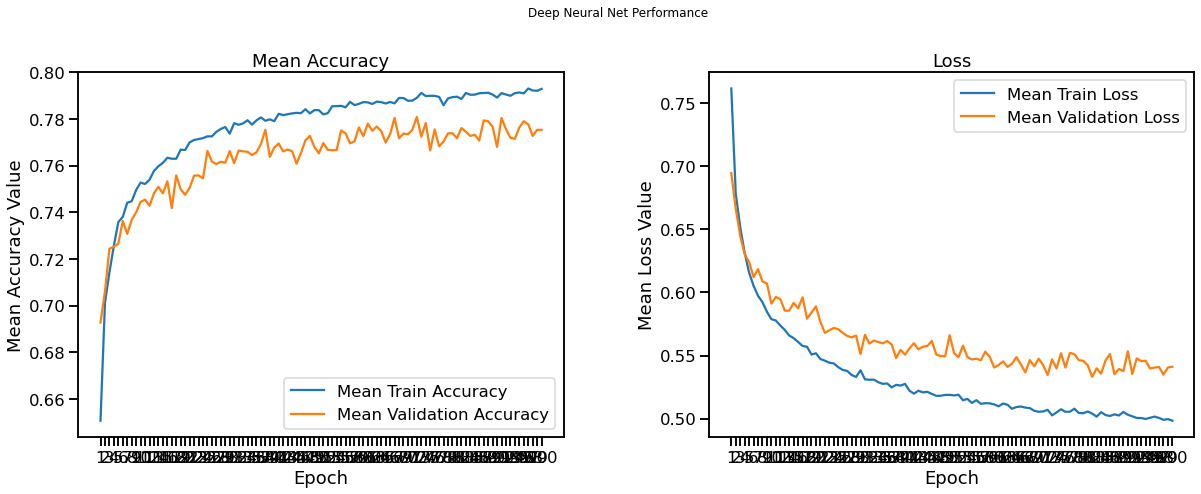

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epoch_set+1))
for i in range(len(history)):
    label="Accuracy KFold"+ str(i)
    ax1.plot(epochs, history[i].history['sparse_categorical_accuracy'], label=label)
    ax1.plot(epochs, history[i].history['val_sparse_categorical_accuracy'], label=label)
    ax1.set_xticks(epochs)
    #ax1.set_ylim([0,1])
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")
    
    label="Loss KFold"+ str(i)

    ax2.plot(epochs, history[i].history['loss'], label=label)
    ax2.plot(epochs, history[i].history['val_loss'], label=label)

    #ax2.set_ylim([0,1])
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")
    
    
#The code below attempt to present less clutttered "averge" picture of the training and validation result.

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['sparse_categorical_accuracy']))
    vsca.append(np.array(history[i].history['val_sparse_categorical_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
#ax1.set_ylim([0,1])
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
#ax2.set_ylim([0,1])
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

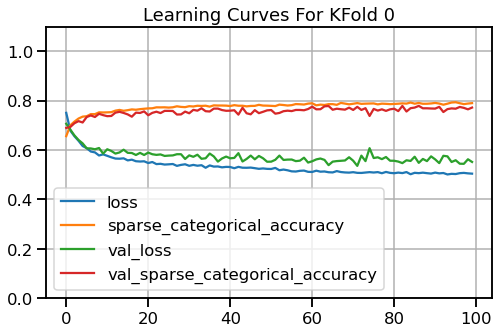

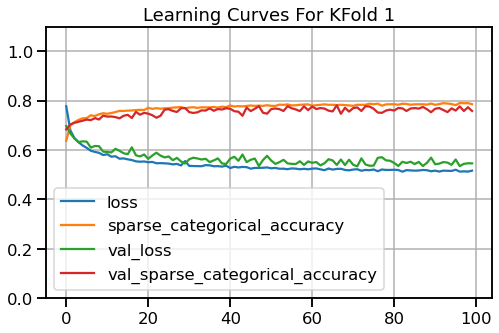

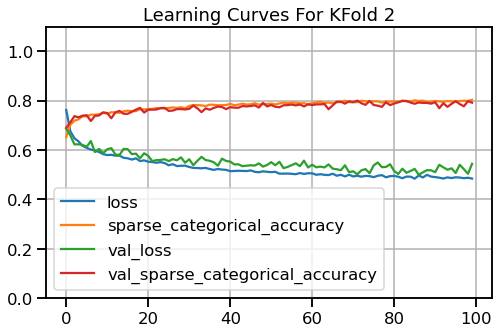

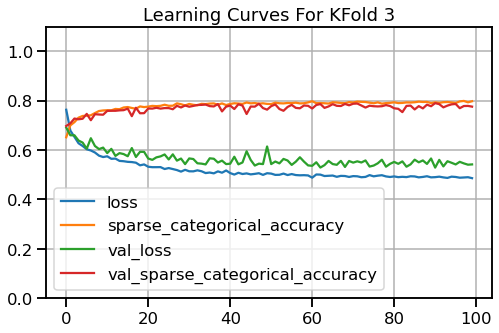

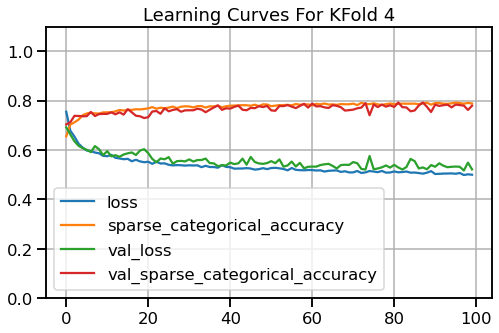

In [102]:
#plot out the learning curve for each K-fold.

for i in range(len(history)):

     pd.DataFrame(history[i].history).plot(figsize=(8, 5))
     plt.title('Learning Curves For KFold '+ str(i))
     plt.grid(True)
     plt.gca().set_ylim(0, 1.1) # set the vertical range to [0-1]
     plt.show()

### Evaluate Model Performance

In [103]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 433us/step - loss: 0.8556 - sparse_categorical_accuracy: 0.6538


[0.8555776476860046, 0.6538461446762085]

In [104]:
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score,classification_report
y_pred = model.predict(X_test)

In [105]:
#Convert probabilities to class prediction

y_pred_class=[np.argmax(i) for i in y_pred]

In [106]:
confusion_matrix(y_test, y_pred_class)


array([[ 28,  19,   2],
       [167, 640, 192],
       [  8,  62, 182]])

In [107]:
def plot_consfusionmatrix(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['low', 'average','good']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 


Confusion Matrxi Of Test Set:


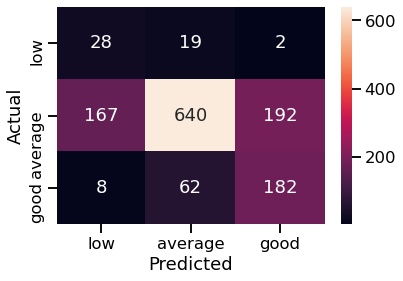

In [108]:
plot_consfusionmatrix(y_test,y_pred_class) 

In [109]:
print(classification_report(y_test,y_pred_class))



              precision    recall  f1-score   support

           0       0.14      0.57      0.22        49
           1       0.89      0.64      0.74       999
           2       0.48      0.72      0.58       252

    accuracy                           0.65      1300
   macro avg       0.50      0.64      0.52      1300
weighted avg       0.78      0.65      0.69      1300



Cohen's Kappa

A useful metric for evaluating multi-class classifiers, especially on imbalanced datasets.
Cohen Kapp's measures the proximity of the prediced class to the actual class when compared to random classification.

Output is normalized to between 0 and 1. Generally the closer the score to one the better the classifier. 


In [110]:
cohen_kappa_score(y_test, y_pred_class)


0.32371662223619735

## Experiment 2: Classify Wine Quality - Deep Neural Network

In [112]:
%%time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential

epoch_set=200
seed = 42
history=[]
m=None

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    model = Sequential()
    model.add(Dense(20, input_dim=12, activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
#    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
#     model.add(Dropout(0.4))
    model.add(Dense(20, activation='relu',kernel_initializer='he_normal'))
#                     #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
#     model.add(Dropout(0.3))
    model.add(Dense(20, activation='relu',kernel_initializer='he_normal'))
#                     #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
    model.add(Dropout(0.2))
#     model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
#                     #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
#     model.add(Dropout(0.1))
    
    model.add(Dense(3,activation='softmax')) #there are 10 labels of wine quality from 0to10.
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)    
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    m=model
    h=(model.fit(X_smote_train[train,:], y_smote_train[train],
                 validation_data=(X_smote_train[test,:],y_smote_train[test]), 
                 epochs=epoch_set, verbose=1))
    history.append(h)

Epoch 1/100
299/299 [==============================] - 0s 1ms/step - loss: 0.9453 - sparse_categorical_accuracy: 0.5601 - val_loss: 0.7972 - val_sparse_categorical_accuracy: 0.6495
Epoch 2/100
299/299 [==============================] - 0s 751us/step - loss: 0.7633 - sparse_categorical_accuracy: 0.6650 - val_loss: 0.7131 - val_sparse_categorical_accuracy: 0.6826
Epoch 3/100
299/299 [==============================] - 0s 737us/step - loss: 0.7030 - sparse_categorical_accuracy: 0.6948 - val_loss: 0.6774 - val_sparse_categorical_accuracy: 0.6964
Epoch 4/100
299/299 [==============================] - 0s 714us/step - loss: 0.6650 - sparse_categorical_accuracy: 0.7143 - val_loss: 0.6464 - val_sparse_categorical_accuracy: 0.7195
Epoch 5/100
299/299 [==============================] - 0s 742us/step - loss: 0.6364 - sparse_categorical_accuracy: 0.7285 - val_loss: 0.6246 - val_sparse_categorical_accuracy: 0.7208
Epoch 6/100
299/299 [==============================] - 0s 723us/step - loss: 0.6123 - s

299/299 [==============================] - 0s 864us/step - loss: 0.3742 - sparse_categorical_accuracy: 0.8503 - val_loss: 0.4310 - val_sparse_categorical_accuracy: 0.8214
Epoch 46/100
299/299 [==============================] - 0s 700us/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8302
Epoch 47/100
299/299 [==============================] - 0s 779us/step - loss: 0.3786 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.4342 - val_sparse_categorical_accuracy: 0.8252
Epoch 48/100
299/299 [==============================] - 0s 737us/step - loss: 0.3729 - sparse_categorical_accuracy: 0.8475 - val_loss: 0.4283 - val_sparse_categorical_accuracy: 0.8256
Epoch 49/100
299/299 [==============================] - 0s 725us/step - loss: 0.3686 - sparse_categorical_accuracy: 0.8505 - val_loss: 0.4211 - val_sparse_categorical_accuracy: 0.8247
Epoch 50/100
299/299 [==============================] - 0s 727us/step - loss: 0.3688 - sparse

299/299 [==============================] - 0s 771us/step - loss: 0.3116 - sparse_categorical_accuracy: 0.8755 - val_loss: 0.3998 - val_sparse_categorical_accuracy: 0.8457
Epoch 90/100
299/299 [==============================] - 0s 798us/step - loss: 0.3155 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.3966 - val_sparse_categorical_accuracy: 0.8432
Epoch 91/100
299/299 [==============================] - 0s 813us/step - loss: 0.3137 - sparse_categorical_accuracy: 0.8751 - val_loss: 0.3961 - val_sparse_categorical_accuracy: 0.8444
Epoch 92/100
299/299 [==============================] - 0s 721us/step - loss: 0.3156 - sparse_categorical_accuracy: 0.8724 - val_loss: 0.3886 - val_sparse_categorical_accuracy: 0.8474
Epoch 93/100
299/299 [==============================] - 0s 724us/step - loss: 0.3105 - sparse_categorical_accuracy: 0.8745 - val_loss: 0.3987 - val_sparse_categorical_accuracy: 0.8398
Epoch 94/100
299/299 [==============================] - 0s 716us/step - loss: 0.3157 - sparse

Epoch 34/100
299/299 [==============================] - 0s 772us/step - loss: 0.3849 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.4217 - val_sparse_categorical_accuracy: 0.8285
Epoch 35/100
299/299 [==============================] - 0s 771us/step - loss: 0.3773 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.4056 - val_sparse_categorical_accuracy: 0.8361
Epoch 36/100
299/299 [==============================] - 0s 845us/step - loss: 0.3706 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.4045 - val_sparse_categorical_accuracy: 0.8394
Epoch 37/100
299/299 [==============================] - 0s 796us/step - loss: 0.3718 - sparse_categorical_accuracy: 0.8468 - val_loss: 0.4113 - val_sparse_categorical_accuracy: 0.8323
Epoch 38/100
299/299 [==============================] - 0s 846us/step - loss: 0.3686 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.4191 - val_sparse_categorical_accuracy: 0.8298
Epoch 39/100
299/299 [==============================] - 0s 798us/step - loss: 0.

299/299 [==============================] - 0s 711us/step - loss: 0.3062 - sparse_categorical_accuracy: 0.8752 - val_loss: 0.4137 - val_sparse_categorical_accuracy: 0.8432
Epoch 79/100
299/299 [==============================] - 0s 709us/step - loss: 0.3024 - sparse_categorical_accuracy: 0.8774 - val_loss: 0.3889 - val_sparse_categorical_accuracy: 0.8499
Epoch 80/100
299/299 [==============================] - 0s 705us/step - loss: 0.3044 - sparse_categorical_accuracy: 0.8764 - val_loss: 0.3828 - val_sparse_categorical_accuracy: 0.8528
Epoch 81/100
299/299 [==============================] - 0s 731us/step - loss: 0.2937 - sparse_categorical_accuracy: 0.8803 - val_loss: 0.3863 - val_sparse_categorical_accuracy: 0.8553
Epoch 82/100
299/299 [==============================] - 0s 724us/step - loss: 0.2991 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3884 - val_sparse_categorical_accuracy: 0.8507
Epoch 83/100
299/299 [==============================] - 0s 757us/step - loss: 0.2998 - sparse

Epoch 23/100
299/299 [==============================] - 0s 771us/step - loss: 0.4580 - sparse_categorical_accuracy: 0.8132 - val_loss: 0.4666 - val_sparse_categorical_accuracy: 0.7996
Epoch 24/100
299/299 [==============================] - 0s 735us/step - loss: 0.4531 - sparse_categorical_accuracy: 0.8134 - val_loss: 0.4762 - val_sparse_categorical_accuracy: 0.7958
Epoch 25/100
299/299 [==============================] - 0s 770us/step - loss: 0.4483 - sparse_categorical_accuracy: 0.8124 - val_loss: 0.4784 - val_sparse_categorical_accuracy: 0.7912
Epoch 26/100
299/299 [==============================] - 0s 715us/step - loss: 0.4430 - sparse_categorical_accuracy: 0.8126 - val_loss: 0.4680 - val_sparse_categorical_accuracy: 0.7996
Epoch 27/100
299/299 [==============================] - 0s 733us/step - loss: 0.4382 - sparse_categorical_accuracy: 0.8183 - val_loss: 0.4661 - val_sparse_categorical_accuracy: 0.8034
Epoch 28/100
299/299 [==============================] - 0s 751us/step - loss: 0.

299/299 [==============================] - 0s 694us/step - loss: 0.3403 - sparse_categorical_accuracy: 0.8596 - val_loss: 0.4130 - val_sparse_categorical_accuracy: 0.8403
Epoch 68/100
299/299 [==============================] - 0s 688us/step - loss: 0.3386 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.8361
Epoch 69/100
299/299 [==============================] - 0s 680us/step - loss: 0.3392 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.4124 - val_sparse_categorical_accuracy: 0.8365
Epoch 70/100
299/299 [==============================] - 0s 704us/step - loss: 0.3391 - sparse_categorical_accuracy: 0.8586 - val_loss: 0.4015 - val_sparse_categorical_accuracy: 0.8440
Epoch 71/100
299/299 [==============================] - 0s 686us/step - loss: 0.3337 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.4267 - val_sparse_categorical_accuracy: 0.8453
Epoch 72/100
299/299 [==============================] - 0s 697us/step - loss: 0.3386 - sparse

Epoch 12/100
299/299 [==============================] - 0s 860us/step - loss: 0.5340 - sparse_categorical_accuracy: 0.7760 - val_loss: 0.5318 - val_sparse_categorical_accuracy: 0.7753
Epoch 13/100
299/299 [==============================] - 0s 892us/step - loss: 0.5231 - sparse_categorical_accuracy: 0.7795 - val_loss: 0.5186 - val_sparse_categorical_accuracy: 0.7816
Epoch 14/100
299/299 [==============================] - 0s 905us/step - loss: 0.5180 - sparse_categorical_accuracy: 0.7810 - val_loss: 0.5097 - val_sparse_categorical_accuracy: 0.7866
Epoch 15/100
299/299 [==============================] - 0s 870us/step - loss: 0.5046 - sparse_categorical_accuracy: 0.7877 - val_loss: 0.5025 - val_sparse_categorical_accuracy: 0.7883
Epoch 16/100
299/299 [==============================] - 0s 901us/step - loss: 0.4925 - sparse_categorical_accuracy: 0.7971 - val_loss: 0.4956 - val_sparse_categorical_accuracy: 0.7966
Epoch 17/100
299/299 [==============================] - 0s 855us/step - loss: 0.

299/299 [==============================] - 0s 973us/step - loss: 0.3624 - sparse_categorical_accuracy: 0.8534 - val_loss: 0.4224 - val_sparse_categorical_accuracy: 0.8373
Epoch 57/100
299/299 [==============================] - 0s 973us/step - loss: 0.3557 - sparse_categorical_accuracy: 0.8577 - val_loss: 0.4318 - val_sparse_categorical_accuracy: 0.8335
Epoch 58/100
299/299 [==============================] - 0s 940us/step - loss: 0.3489 - sparse_categorical_accuracy: 0.8584 - val_loss: 0.4226 - val_sparse_categorical_accuracy: 0.8382
Epoch 59/100
299/299 [==============================] - 0s 937us/step - loss: 0.3524 - sparse_categorical_accuracy: 0.8578 - val_loss: 0.4233 - val_sparse_categorical_accuracy: 0.8386
Epoch 60/100
299/299 [==============================] - 0s 950us/step - loss: 0.3516 - sparse_categorical_accuracy: 0.8565 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.8398
Epoch 61/100
299/299 [==============================] - 0s 978us/step - loss: 0.3537 - sparse

Epoch 1/100
299/299 [==============================] - 0s 1ms/step - loss: 1.0201 - sparse_categorical_accuracy: 0.5047 - val_loss: 0.8193 - val_sparse_categorical_accuracy: 0.6348
Epoch 2/100
299/299 [==============================] - 0s 864us/step - loss: 0.7838 - sparse_categorical_accuracy: 0.6455 - val_loss: 0.7000 - val_sparse_categorical_accuracy: 0.6893
Epoch 3/100
299/299 [==============================] - 0s 880us/step - loss: 0.7095 - sparse_categorical_accuracy: 0.6853 - val_loss: 0.6682 - val_sparse_categorical_accuracy: 0.7099
Epoch 4/100
299/299 [==============================] - 0s 864us/step - loss: 0.6772 - sparse_categorical_accuracy: 0.7039 - val_loss: 0.6516 - val_sparse_categorical_accuracy: 0.7220
Epoch 5/100
299/299 [==============================] - 0s 810us/step - loss: 0.6547 - sparse_categorical_accuracy: 0.7132 - val_loss: 0.6273 - val_sparse_categorical_accuracy: 0.7258
Epoch 6/100
299/299 [==============================] - 0s 811us/step - loss: 0.6375 - s

299/299 [==============================] - 0s 817us/step - loss: 0.3669 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8361
Epoch 46/100
299/299 [==============================] - 0s 827us/step - loss: 0.3674 - sparse_categorical_accuracy: 0.8510 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.8239
Epoch 47/100
299/299 [==============================] - 0s 818us/step - loss: 0.3714 - sparse_categorical_accuracy: 0.8521 - val_loss: 0.4147 - val_sparse_categorical_accuracy: 0.8365
Epoch 48/100
299/299 [==============================] - 0s 825us/step - loss: 0.3679 - sparse_categorical_accuracy: 0.8508 - val_loss: 0.4125 - val_sparse_categorical_accuracy: 0.8365
Epoch 49/100
299/299 [==============================] - 0s 841us/step - loss: 0.3648 - sparse_categorical_accuracy: 0.8547 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8327
Epoch 50/100
299/299 [==============================] - 0s 827us/step - loss: 0.3638 - sparse

299/299 [==============================] - 0s 875us/step - loss: 0.3122 - sparse_categorical_accuracy: 0.8755 - val_loss: 0.3956 - val_sparse_categorical_accuracy: 0.8520
Epoch 90/100
299/299 [==============================] - 0s 831us/step - loss: 0.3071 - sparse_categorical_accuracy: 0.8782 - val_loss: 0.4080 - val_sparse_categorical_accuracy: 0.8453
Epoch 91/100
299/299 [==============================] - 0s 826us/step - loss: 0.3071 - sparse_categorical_accuracy: 0.8760 - val_loss: 0.4043 - val_sparse_categorical_accuracy: 0.8499
Epoch 92/100
299/299 [==============================] - 0s 815us/step - loss: 0.3084 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.3949 - val_sparse_categorical_accuracy: 0.8453
Epoch 93/100
299/299 [==============================] - 0s 873us/step - loss: 0.3078 - sparse_categorical_accuracy: 0.8768 - val_loss: 0.4095 - val_sparse_categorical_accuracy: 0.8491
Epoch 94/100
299/299 [==============================] - 0s 798us/step - loss: 0.3129 - sparse

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_51 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_52 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_53 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_29 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 3)                 63        
Total params: 1,583
Trainable params: 1,583
Non-trainable params: 0
___________________________________________________

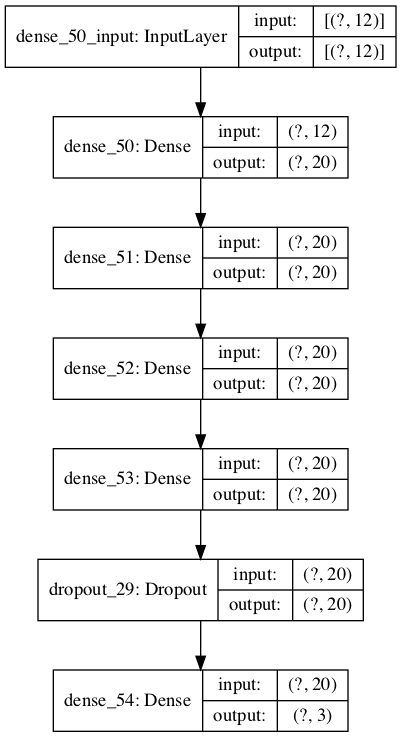

None

In [113]:
display(plot_model(m,show_shapes=True),model.summary())

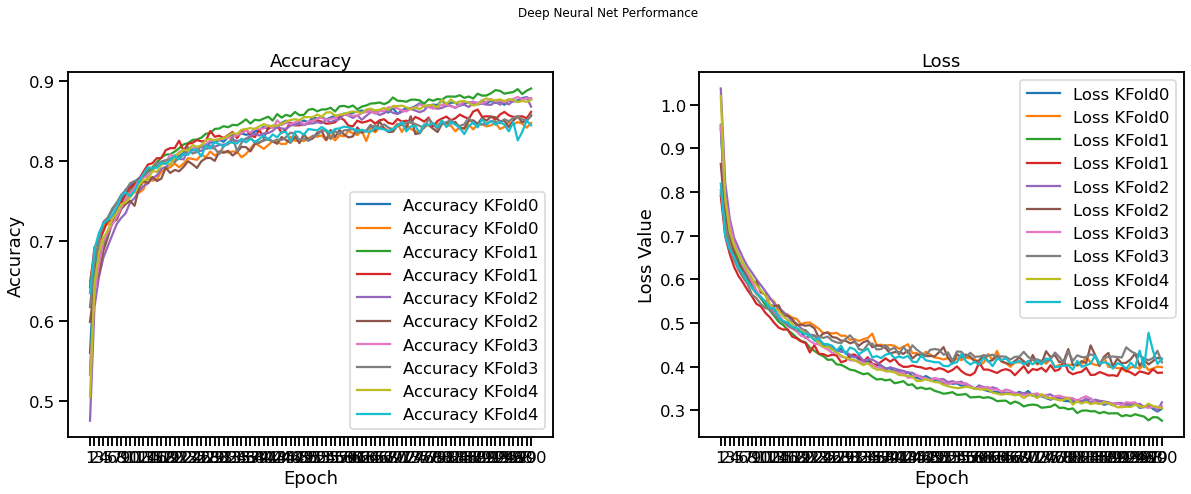

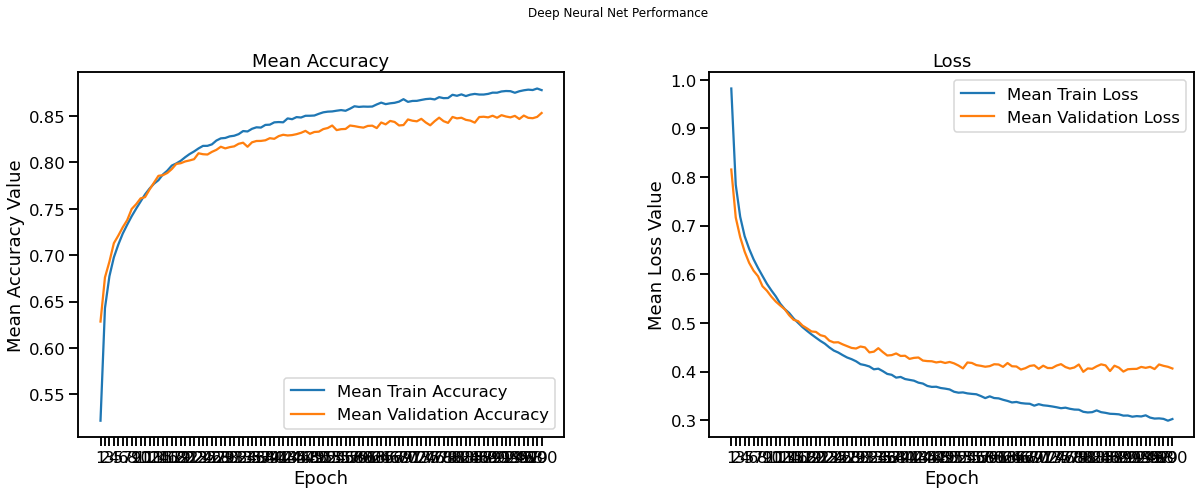

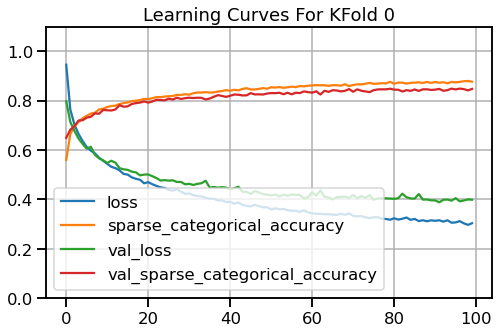

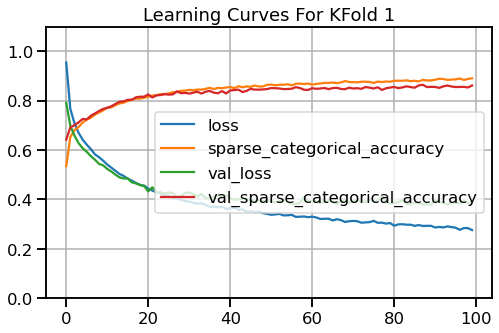

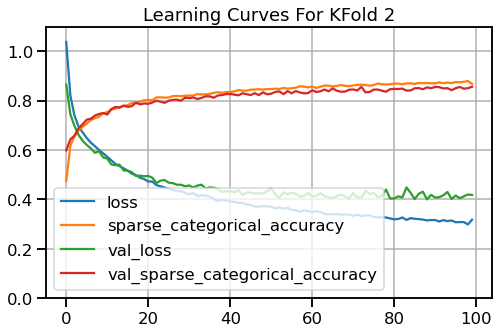

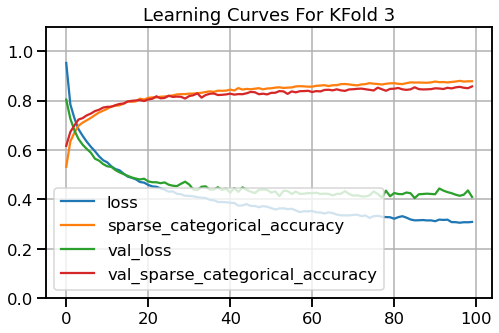

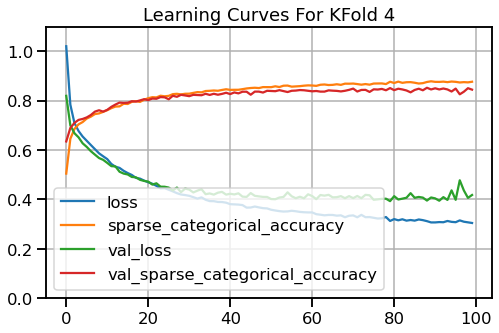

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epoch_set+1))
for i in range(len(history)):
    label="Accuracy KFold"+ str(i)
    ax1.plot(epochs, history[i].history['sparse_categorical_accuracy'], label=label)
    ax1.plot(epochs, history[i].history['val_sparse_categorical_accuracy'], label=label)
    ax1.set_xticks(epochs)
    #ax1.set_ylim([0,1])
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")
    
    label="Loss KFold"+ str(i)

    ax2.plot(epochs, history[i].history['loss'], label=label)
    ax2.plot(epochs, history[i].history['val_loss'], label=label)

    #ax2.set_ylim([0,1])
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")
    
    
#The code below attempt to present less clutttered "averge" picture of the training and validation result.

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['sparse_categorical_accuracy']))
    vsca.append(np.array(history[i].history['val_sparse_categorical_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
#ax1.set_ylim([0,1])
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
#ax2.set_ylim([0,1])
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")



#plot out the learning curve for each K-fold.

for i in range(len(history)):

     pd.DataFrame(history[i].history).plot(figsize=(8, 5))
     plt.title('Learning Curves For KFold '+ str(i))
     plt.grid(True)
     plt.gca().set_ylim(0, 1.1) # set the vertical range to [0-1]
     plt.show()

In [115]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 444us/step - loss: 1.1397 - sparse_categorical_accuracy: 0.6692


[1.1397151947021484, 0.6692307591438293]

In [116]:
y_pred

array([[4.6790922e-01, 4.6649891e-01, 6.5591894e-02],
       [8.9686946e-06, 9.9998903e-01, 2.0020796e-06],
       [9.1244037e-06, 6.2943585e-02, 9.3704724e-01],
       ...,
       [8.2577427e-04, 2.9817721e-01, 7.0099705e-01],
       [4.0749809e-01, 5.8827341e-01, 4.2284909e-03],
       [7.3479455e-06, 9.3581252e-02, 9.0641141e-01]], dtype=float32)

array([[ 28,  17,   4],
       [137, 643, 219],
       [  9,  44, 199]])

Confusion Matrxi Of Test Set:
              precision    recall  f1-score   support

           0       0.16      0.57      0.25        49
           1       0.91      0.64      0.76       999
           2       0.47      0.79      0.59       252

    accuracy                           0.67      1300
   macro avg       0.52      0.67      0.53      1300
weighted avg       0.80      0.67      0.70      1300



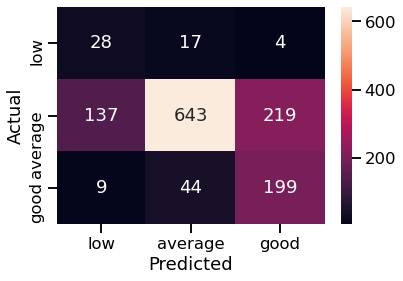

In [117]:
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score,classification_report
y_pred = model.predict(X_test)

#Convert probabilities to class prediction

y_pred_class=[np.argmax(i) for i in y_pred]

display(confusion_matrix(y_test, y_pred_class))

def plot_consfusionmatrix(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['low', 'average','good']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 

plot_consfusionmatrix(y_test,y_pred_class) 
print(classification_report(y_test,y_pred_class))

## Experiment 3: Predict Wine Quality As A Regression Task

### Set Up Neural Network Model For Regression Task - Predicting Wine Quality

The quality of a wine is an ordinal scale with 0 being the lowest and 10 being the best wine quality. 

The task to predict wine quality can be viewed as a ordinal regression task if we assume wine quality to be a continous variable. But this can also be viewed as a classification problem given that the number of labels for wine quality is only 10. 

This project will approach the prediction of wine quality as an ordinal regression task since the classification technique has already been used for classifying wine type. 



In [126]:
%%time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential

epoch_set=200
seed = 42
history=[]
m=None

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    model = Sequential()
    model.add(Dense(20, input_dim=12, activation='relu',name='Wine_Quality'),)
    model.add(Dense(20, activation='relu'),)

    model.add(Dense(1,name='Output'))
    
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    m=model
    h=(model.fit(X_smote_train[train,:], y_smote_train[train], 
                 validation_data=(X_smote_train[test,:],y_smote_train[test]), 
                 epochs=epoch_set, verbose=1))
    history.append(h)

Epoch 1/200
299/299 [==============================] - 0s 889us/step - loss: 0.3412 - mae: 0.4646 - val_loss: 0.2784 - val_mae: 0.4089
Epoch 2/200
299/299 [==============================] - 0s 633us/step - loss: 0.2585 - mae: 0.4020 - val_loss: 0.2900 - val_mae: 0.4273
Epoch 3/200
299/299 [==============================] - 0s 652us/step - loss: 0.2455 - mae: 0.3899 - val_loss: 0.2501 - val_mae: 0.4001
Epoch 4/200
299/299 [==============================] - 0s 656us/step - loss: 0.2309 - mae: 0.3785 - val_loss: 0.2533 - val_mae: 0.4008
Epoch 5/200
299/299 [==============================] - 0s 634us/step - loss: 0.2267 - mae: 0.3731 - val_loss: 0.2353 - val_mae: 0.3808
Epoch 6/200
299/299 [==============================] - 0s 646us/step - loss: 0.2208 - mae: 0.3667 - val_loss: 0.2530 - val_mae: 0.3900
Epoch 7/200
299/299 [==============================] - 0s 635us/step - loss: 0.2094 - mae: 0.3566 - val_loss: 0.2359 - val_mae: 0.3688
Epoch 8/200
299/299 [==============================] - 

299/299 [==============================] - 0s 657us/step - loss: 0.1423 - mae: 0.2864 - val_loss: 0.1743 - val_mae: 0.3019
Epoch 62/200
299/299 [==============================] - 0s 628us/step - loss: 0.1413 - mae: 0.2840 - val_loss: 0.1832 - val_mae: 0.3171
Epoch 63/200
299/299 [==============================] - 0s 677us/step - loss: 0.1397 - mae: 0.2830 - val_loss: 0.1709 - val_mae: 0.3006
Epoch 64/200
299/299 [==============================] - 0s 659us/step - loss: 0.1421 - mae: 0.2846 - val_loss: 0.1677 - val_mae: 0.3129
Epoch 65/200
299/299 [==============================] - 0s 639us/step - loss: 0.1417 - mae: 0.2845 - val_loss: 0.1747 - val_mae: 0.3045
Epoch 66/200
299/299 [==============================] - 0s 645us/step - loss: 0.1414 - mae: 0.2830 - val_loss: 0.1719 - val_mae: 0.3116
Epoch 67/200
299/299 [==============================] - 0s 660us/step - loss: 0.1428 - mae: 0.2867 - val_loss: 0.1705 - val_mae: 0.3042
Epoch 68/200
299/299 [==============================] - 0s 64

299/299 [==============================] - 0s 659us/step - loss: 0.1327 - mae: 0.2747 - val_loss: 0.1765 - val_mae: 0.3214
Epoch 122/200
299/299 [==============================] - 0s 674us/step - loss: 0.1312 - mae: 0.2728 - val_loss: 0.1659 - val_mae: 0.3092
Epoch 123/200
299/299 [==============================] - 0s 754us/step - loss: 0.1357 - mae: 0.2777 - val_loss: 0.1849 - val_mae: 0.3217
Epoch 124/200
299/299 [==============================] - 0s 786us/step - loss: 0.1296 - mae: 0.2714 - val_loss: 0.1758 - val_mae: 0.3101
Epoch 125/200
299/299 [==============================] - 0s 896us/step - loss: 0.1341 - mae: 0.2758 - val_loss: 0.1761 - val_mae: 0.3387
Epoch 126/200
299/299 [==============================] - 0s 905us/step - loss: 0.1322 - mae: 0.2744 - val_loss: 0.1729 - val_mae: 0.3070
Epoch 127/200
299/299 [==============================] - 0s 944us/step - loss: 0.1325 - mae: 0.2734 - val_loss: 0.1788 - val_mae: 0.3109
Epoch 128/200
299/299 [==============================] 

Epoch 181/200
299/299 [==============================] - 0s 652us/step - loss: 0.1322 - mae: 0.2766 - val_loss: 0.1879 - val_mae: 0.3230
Epoch 182/200
299/299 [==============================] - 0s 672us/step - loss: 0.1290 - mae: 0.2704 - val_loss: 0.1810 - val_mae: 0.3193
Epoch 183/200
299/299 [==============================] - 0s 658us/step - loss: 0.1324 - mae: 0.2757 - val_loss: 0.1722 - val_mae: 0.3074
Epoch 184/200
299/299 [==============================] - 0s 681us/step - loss: 0.1294 - mae: 0.2716 - val_loss: 0.1678 - val_mae: 0.3002
Epoch 185/200
299/299 [==============================] - 0s 649us/step - loss: 0.1287 - mae: 0.2709 - val_loss: 0.1652 - val_mae: 0.2987
Epoch 186/200
299/299 [==============================] - 0s 664us/step - loss: 0.1275 - mae: 0.2697 - val_loss: 0.1717 - val_mae: 0.3193
Epoch 187/200
299/299 [==============================] - 0s 655us/step - loss: 0.1300 - mae: 0.2726 - val_loss: 0.1726 - val_mae: 0.3181
Epoch 188/200
299/299 [==================

299/299 [==============================] - 0s 723us/step - loss: 0.1536 - mae: 0.3019 - val_loss: 0.1791 - val_mae: 0.3248
Epoch 42/200
299/299 [==============================] - 0s 639us/step - loss: 0.1560 - mae: 0.3059 - val_loss: 0.1835 - val_mae: 0.3329
Epoch 43/200
299/299 [==============================] - 0s 656us/step - loss: 0.1537 - mae: 0.3019 - val_loss: 0.1809 - val_mae: 0.3141
Epoch 44/200
299/299 [==============================] - 0s 668us/step - loss: 0.1574 - mae: 0.3059 - val_loss: 0.1811 - val_mae: 0.3225
Epoch 45/200
299/299 [==============================] - 0s 686us/step - loss: 0.1558 - mae: 0.3061 - val_loss: 0.1868 - val_mae: 0.3231
Epoch 46/200
299/299 [==============================] - 0s 677us/step - loss: 0.1542 - mae: 0.3025 - val_loss: 0.1792 - val_mae: 0.3238
Epoch 47/200
299/299 [==============================] - 0s 654us/step - loss: 0.1531 - mae: 0.3036 - val_loss: 0.1889 - val_mae: 0.3322
Epoch 48/200
299/299 [==============================] - 0s 64

299/299 [==============================] - 0s 695us/step - loss: 0.1417 - mae: 0.2878 - val_loss: 0.1809 - val_mae: 0.3251
Epoch 102/200
299/299 [==============================] - 0s 696us/step - loss: 0.1411 - mae: 0.2881 - val_loss: 0.1638 - val_mae: 0.3086
Epoch 103/200
299/299 [==============================] - 0s 699us/step - loss: 0.1439 - mae: 0.2921 - val_loss: 0.1617 - val_mae: 0.2968
Epoch 104/200
299/299 [==============================] - 0s 711us/step - loss: 0.1434 - mae: 0.2902 - val_loss: 0.1603 - val_mae: 0.3007
Epoch 105/200
299/299 [==============================] - 0s 720us/step - loss: 0.1445 - mae: 0.2914 - val_loss: 0.1620 - val_mae: 0.3017
Epoch 106/200
299/299 [==============================] - 0s 731us/step - loss: 0.1403 - mae: 0.2875 - val_loss: 0.1730 - val_mae: 0.3232
Epoch 107/200
299/299 [==============================] - 0s 733us/step - loss: 0.1401 - mae: 0.2876 - val_loss: 0.1739 - val_mae: 0.3140
Epoch 108/200
299/299 [==============================] 

299/299 [==============================] - 0s 999us/step - loss: 0.1379 - mae: 0.2845 - val_loss: 0.1849 - val_mae: 0.3342
Epoch 162/200
299/299 [==============================] - 0s 983us/step - loss: 0.1403 - mae: 0.2868 - val_loss: 0.1761 - val_mae: 0.3210
Epoch 163/200
299/299 [==============================] - 0s 1ms/step - loss: 0.1389 - mae: 0.2860 - val_loss: 0.1835 - val_mae: 0.3119
Epoch 164/200
299/299 [==============================] - 0s 984us/step - loss: 0.1361 - mae: 0.2816 - val_loss: 0.1685 - val_mae: 0.3206
Epoch 165/200
299/299 [==============================] - 0s 995us/step - loss: 0.1411 - mae: 0.2887 - val_loss: 0.1650 - val_mae: 0.3062
Epoch 166/200
299/299 [==============================] - 0s 1ms/step - loss: 0.1385 - mae: 0.2847 - val_loss: 0.1703 - val_mae: 0.3141
Epoch 167/200
299/299 [==============================] - 0s 973us/step - loss: 0.1352 - mae: 0.2823 - val_loss: 0.1656 - val_mae: 0.3023
Epoch 168/200
299/299 [==============================] - 0s

299/299 [==============================] - 0s 959us/step - loss: 0.1629 - mae: 0.3091 - val_loss: 0.1970 - val_mae: 0.3402
Epoch 22/200
299/299 [==============================] - 0s 931us/step - loss: 0.1644 - mae: 0.3098 - val_loss: 0.1779 - val_mae: 0.3266
Epoch 23/200
299/299 [==============================] - 0s 893us/step - loss: 0.1607 - mae: 0.3058 - val_loss: 0.1799 - val_mae: 0.3148
Epoch 24/200
299/299 [==============================] - 0s 936us/step - loss: 0.1584 - mae: 0.3029 - val_loss: 0.1785 - val_mae: 0.3100
Epoch 25/200
299/299 [==============================] - 0s 895us/step - loss: 0.1607 - mae: 0.3061 - val_loss: 0.1730 - val_mae: 0.3136
Epoch 26/200
299/299 [==============================] - 0s 903us/step - loss: 0.1666 - mae: 0.3128 - val_loss: 0.1700 - val_mae: 0.3193
Epoch 27/200
299/299 [==============================] - 0s 894us/step - loss: 0.1574 - mae: 0.3030 - val_loss: 0.1702 - val_mae: 0.3124
Epoch 28/200
299/299 [==============================] - 0s 96

299/299 [==============================] - 0s 875us/step - loss: 0.1375 - mae: 0.2793 - val_loss: 0.1598 - val_mae: 0.2862
Epoch 82/200
299/299 [==============================] - 0s 920us/step - loss: 0.1371 - mae: 0.2794 - val_loss: 0.1554 - val_mae: 0.2911
Epoch 83/200
299/299 [==============================] - 0s 870us/step - loss: 0.1361 - mae: 0.2787 - val_loss: 0.1691 - val_mae: 0.3073
Epoch 84/200
299/299 [==============================] - 0s 906us/step - loss: 0.1374 - mae: 0.2799 - val_loss: 0.1558 - val_mae: 0.2944
Epoch 85/200
299/299 [==============================] - 0s 909us/step - loss: 0.1375 - mae: 0.2800 - val_loss: 0.1631 - val_mae: 0.3051
Epoch 86/200
299/299 [==============================] - 0s 917us/step - loss: 0.1385 - mae: 0.2823 - val_loss: 0.1510 - val_mae: 0.2936
Epoch 87/200
299/299 [==============================] - 0s 935us/step - loss: 0.1342 - mae: 0.2771 - val_loss: 0.1614 - val_mae: 0.2965
Epoch 88/200
299/299 [==============================] - 0s 92

299/299 [==============================] - 0s 783us/step - loss: 0.1309 - mae: 0.2735 - val_loss: 0.1558 - val_mae: 0.3082
Epoch 142/200
299/299 [==============================] - 0s 783us/step - loss: 0.1317 - mae: 0.2733 - val_loss: 0.1554 - val_mae: 0.2941
Epoch 143/200
299/299 [==============================] - 0s 772us/step - loss: 0.1306 - mae: 0.2717 - val_loss: 0.1563 - val_mae: 0.3008
Epoch 144/200
299/299 [==============================] - 0s 771us/step - loss: 0.1327 - mae: 0.2748 - val_loss: 0.1565 - val_mae: 0.2889
Epoch 145/200
299/299 [==============================] - 0s 774us/step - loss: 0.1327 - mae: 0.2735 - val_loss: 0.1635 - val_mae: 0.3182
Epoch 146/200
299/299 [==============================] - 0s 767us/step - loss: 0.1326 - mae: 0.2756 - val_loss: 0.1564 - val_mae: 0.3086
Epoch 147/200
299/299 [==============================] - 0s 749us/step - loss: 0.1328 - mae: 0.2736 - val_loss: 0.1475 - val_mae: 0.2862
Epoch 148/200
299/299 [==============================] 

Epoch 1/200
299/299 [==============================] - 0s 1ms/step - loss: 0.3362 - mae: 0.4654 - val_loss: 0.2934 - val_mae: 0.4253
Epoch 2/200
299/299 [==============================] - 0s 727us/step - loss: 0.2644 - mae: 0.4091 - val_loss: 0.2471 - val_mae: 0.3954
Epoch 3/200
299/299 [==============================] - 0s 729us/step - loss: 0.2435 - mae: 0.3902 - val_loss: 0.2451 - val_mae: 0.3903
Epoch 4/200
299/299 [==============================] - 0s 736us/step - loss: 0.2318 - mae: 0.3803 - val_loss: 0.2273 - val_mae: 0.3835
Epoch 5/200
299/299 [==============================] - 0s 754us/step - loss: 0.2181 - mae: 0.3666 - val_loss: 0.2237 - val_mae: 0.3886
Epoch 6/200
299/299 [==============================] - 0s 731us/step - loss: 0.2121 - mae: 0.3589 - val_loss: 0.2174 - val_mae: 0.3665
Epoch 7/200
299/299 [==============================] - 0s 728us/step - loss: 0.2060 - mae: 0.3533 - val_loss: 0.2157 - val_mae: 0.3676
Epoch 8/200
299/299 [==============================] - 0s

299/299 [==============================] - 0s 760us/step - loss: 0.1402 - mae: 0.2841 - val_loss: 0.1781 - val_mae: 0.3124
Epoch 62/200
299/299 [==============================] - 0s 781us/step - loss: 0.1405 - mae: 0.2843 - val_loss: 0.2125 - val_mae: 0.3641
Epoch 63/200
299/299 [==============================] - 0s 791us/step - loss: 0.1437 - mae: 0.2880 - val_loss: 0.2011 - val_mae: 0.3294
Epoch 64/200
299/299 [==============================] - 0s 774us/step - loss: 0.1492 - mae: 0.2945 - val_loss: 0.1743 - val_mae: 0.3115
Epoch 65/200
299/299 [==============================] - 0s 768us/step - loss: 0.1422 - mae: 0.2870 - val_loss: 0.1787 - val_mae: 0.3292
Epoch 66/200
299/299 [==============================] - 0s 765us/step - loss: 0.1428 - mae: 0.2870 - val_loss: 0.1728 - val_mae: 0.3130
Epoch 67/200
299/299 [==============================] - 0s 792us/step - loss: 0.1411 - mae: 0.2846 - val_loss: 0.1710 - val_mae: 0.3124
Epoch 68/200
299/299 [==============================] - 0s 75

299/299 [==============================] - 0s 820us/step - loss: 0.1393 - mae: 0.2838 - val_loss: 0.1768 - val_mae: 0.3148
Epoch 122/200
299/299 [==============================] - 0s 864us/step - loss: 0.1356 - mae: 0.2803 - val_loss: 0.1861 - val_mae: 0.3254
Epoch 123/200
299/299 [==============================] - 0s 880us/step - loss: 0.1358 - mae: 0.2798 - val_loss: 0.1826 - val_mae: 0.3161
Epoch 124/200
299/299 [==============================] - 0s 883us/step - loss: 0.1380 - mae: 0.2841 - val_loss: 0.1811 - val_mae: 0.3097
Epoch 125/200
299/299 [==============================] - 0s 872us/step - loss: 0.1388 - mae: 0.2835 - val_loss: 0.1695 - val_mae: 0.2986
Epoch 126/200
299/299 [==============================] - 0s 866us/step - loss: 0.1356 - mae: 0.2801 - val_loss: 0.1770 - val_mae: 0.3186
Epoch 127/200
299/299 [==============================] - 0s 880us/step - loss: 0.1349 - mae: 0.2793 - val_loss: 0.1861 - val_mae: 0.3278
Epoch 128/200
299/299 [==============================] 

Epoch 181/200
299/299 [==============================] - 0s 724us/step - loss: 0.1367 - mae: 0.2819 - val_loss: 0.1688 - val_mae: 0.3163
Epoch 182/200
299/299 [==============================] - 0s 727us/step - loss: 0.1334 - mae: 0.2770 - val_loss: 0.1783 - val_mae: 0.3259
Epoch 183/200
299/299 [==============================] - 0s 727us/step - loss: 0.1366 - mae: 0.2813 - val_loss: 0.1748 - val_mae: 0.3200
Epoch 184/200
299/299 [==============================] - 0s 709us/step - loss: 0.1346 - mae: 0.2783 - val_loss: 0.1742 - val_mae: 0.3192
Epoch 185/200
299/299 [==============================] - 0s 717us/step - loss: 0.1335 - mae: 0.2778 - val_loss: 0.1735 - val_mae: 0.3090
Epoch 186/200
299/299 [==============================] - 0s 721us/step - loss: 0.1335 - mae: 0.2777 - val_loss: 0.1780 - val_mae: 0.3055
Epoch 187/200
299/299 [==============================] - 0s 738us/step - loss: 0.1362 - mae: 0.2793 - val_loss: 0.1754 - val_mae: 0.3143
Epoch 188/200
299/299 [==================

299/299 [==============================] - 0s 701us/step - loss: 0.1518 - mae: 0.2970 - val_loss: 0.1753 - val_mae: 0.3296
Epoch 42/200
299/299 [==============================] - 0s 703us/step - loss: 0.1542 - mae: 0.3009 - val_loss: 0.1725 - val_mae: 0.3151
Epoch 43/200
299/299 [==============================] - 0s 699us/step - loss: 0.1523 - mae: 0.2975 - val_loss: 0.1761 - val_mae: 0.3068
Epoch 44/200
299/299 [==============================] - 0s 708us/step - loss: 0.1528 - mae: 0.2983 - val_loss: 0.1806 - val_mae: 0.3291
Epoch 45/200
299/299 [==============================] - 0s 687us/step - loss: 0.1519 - mae: 0.2966 - val_loss: 0.1692 - val_mae: 0.3156
Epoch 46/200
299/299 [==============================] - 0s 698us/step - loss: 0.1495 - mae: 0.2954 - val_loss: 0.1864 - val_mae: 0.3288
Epoch 47/200
299/299 [==============================] - 0s 691us/step - loss: 0.1517 - mae: 0.2979 - val_loss: 0.1745 - val_mae: 0.3198
Epoch 48/200
299/299 [==============================] - 0s 69

299/299 [==============================] - 0s 687us/step - loss: 0.1376 - mae: 0.2824 - val_loss: 0.1724 - val_mae: 0.3009
Epoch 102/200
299/299 [==============================] - 0s 696us/step - loss: 0.1421 - mae: 0.2863 - val_loss: 0.1699 - val_mae: 0.3122
Epoch 103/200
299/299 [==============================] - 0s 657us/step - loss: 0.1408 - mae: 0.2855 - val_loss: 0.1636 - val_mae: 0.3042
Epoch 104/200
299/299 [==============================] - 0s 648us/step - loss: 0.1392 - mae: 0.2847 - val_loss: 0.1785 - val_mae: 0.3085
Epoch 105/200
299/299 [==============================] - 0s 644us/step - loss: 0.1385 - mae: 0.2833 - val_loss: 0.1665 - val_mae: 0.3164
Epoch 106/200
299/299 [==============================] - 0s 693us/step - loss: 0.1368 - mae: 0.2809 - val_loss: 0.1594 - val_mae: 0.2970
Epoch 107/200
299/299 [==============================] - 0s 658us/step - loss: 0.1375 - mae: 0.2830 - val_loss: 0.1649 - val_mae: 0.2949
Epoch 108/200
299/299 [==============================] 

Epoch 161/200
299/299 [==============================] - 0s 681us/step - loss: 0.1357 - mae: 0.2803 - val_loss: 0.1758 - val_mae: 0.3110
Epoch 162/200
299/299 [==============================] - 0s 667us/step - loss: 0.1401 - mae: 0.2858 - val_loss: 0.1726 - val_mae: 0.3034
Epoch 163/200
299/299 [==============================] - 0s 671us/step - loss: 0.1337 - mae: 0.2780 - val_loss: 0.1590 - val_mae: 0.3024
Epoch 164/200
299/299 [==============================] - 0s 671us/step - loss: 0.1338 - mae: 0.2778 - val_loss: 0.1610 - val_mae: 0.3016
Epoch 165/200
299/299 [==============================] - 0s 686us/step - loss: 0.1322 - mae: 0.2742 - val_loss: 0.1604 - val_mae: 0.3079
Epoch 166/200
299/299 [==============================] - 0s 684us/step - loss: 0.1337 - mae: 0.2777 - val_loss: 0.1607 - val_mae: 0.2952
Epoch 167/200
299/299 [==============================] - 0s 674us/step - loss: 0.1329 - mae: 0.2765 - val_loss: 0.1657 - val_mae: 0.3056
Epoch 168/200
299/299 [==================

In [127]:
print(m)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Wine_Quality (Dense)         (None, 20)                260       
_________________________________________________________________
dense_59 (Dense)             (None, 20)                420       
_________________________________________________________________
Output (Dense)               (None, 1)                 21        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


(None, 1)

None

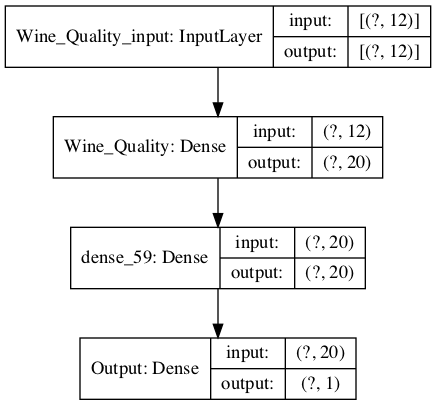

In [128]:
display(model.output_shape, model.summary())


plot_model(m,show_shapes=True)

In [129]:
history[0].history

{'loss': [0.3411831855773926,
  0.2584887742996216,
  0.24548938870429993,
  0.23086367547512054,
  0.226728618144989,
  0.22077137231826782,
  0.20943674445152283,
  0.2003064751625061,
  0.19654236733913422,
  0.190780907869339,
  0.19313055276870728,
  0.18621723353862762,
  0.18046747148036957,
  0.17878028750419617,
  0.17730233073234558,
  0.17363809049129486,
  0.17436744272708893,
  0.1752937138080597,
  0.1703256070613861,
  0.16445600986480713,
  0.1638171672821045,
  0.16493062674999237,
  0.16193778812885284,
  0.1624232828617096,
  0.1593378782272339,
  0.1582934409379959,
  0.15646815299987793,
  0.15688711404800415,
  0.15490548312664032,
  0.15356728434562683,
  0.15442267060279846,
  0.15190352499485016,
  0.15116234123706818,
  0.15575994551181793,
  0.15377983450889587,
  0.15088847279548645,
  0.15149052441120148,
  0.15150460600852966,
  0.15120065212249756,
  0.1489095538854599,
  0.14648254215717316,
  0.14858606457710266,
  0.14779125154018402,
  0.1482942402362

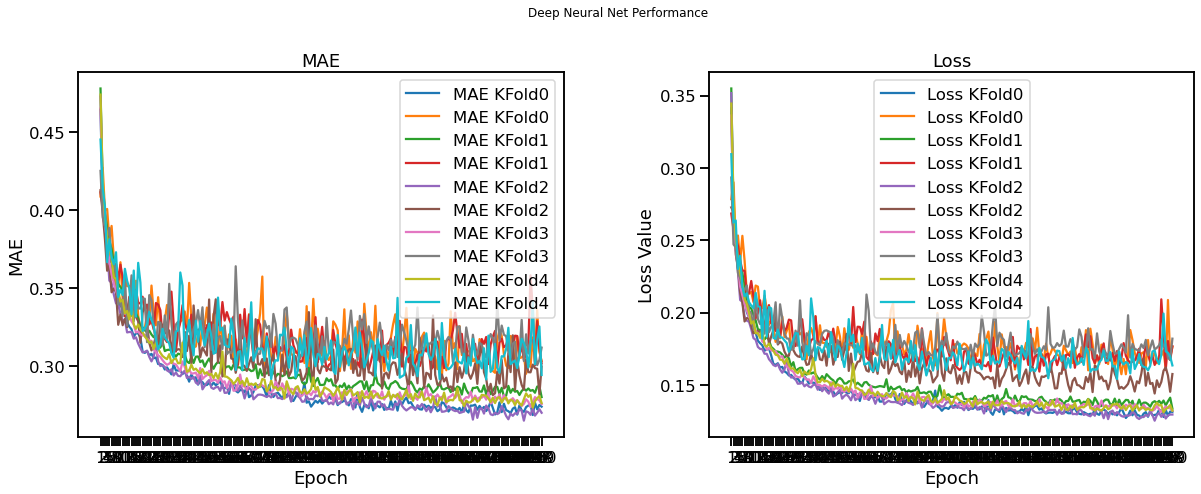

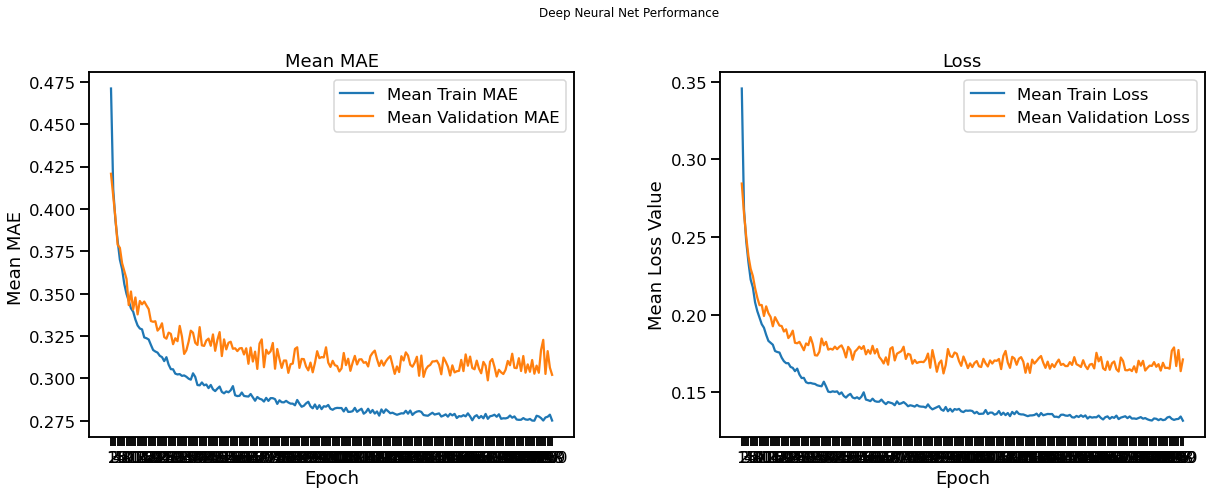

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epoch_set+1))
for i in range(len(history)):
    label="MAE KFold"+ str(i)
    ax1.plot(epochs, history[i].history['mae'], label=label)
    ax1.plot(epochs, history[i].history['val_mae'], label=label)
    ax1.set_xticks(epochs)
    #ax1.set_ylim([0,1])
    ax1.set_ylabel('MAE')
    ax1.set_xlabel('Epoch')
    ax1.set_title('MAE')
    l1 = ax1.legend(loc="best")
    
    label="Loss KFold"+ str(i)

    ax2.plot(epochs, history[i].history['loss'], label=label)
    ax2.plot(epochs, history[i].history['val_loss'], label=label)

    #ax2.set_ylim([0,1])
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")
    
    
#The code below attempt to present less clutttered "averge" picture of the training and validation result.

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['mae']))
    vsca.append(np.array(history[i].history['val_mae']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="MAE KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train MAE' )
ax1.plot(epochs, vsca, label='Mean Validation MAE')
ax1.set_xticks(epochs)
#ax1.set_ylim([0,1])
ax1.set_ylabel('Mean MAE ')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean MAE')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
#ax2.set_ylim([0,1])
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

The output is noisy. 

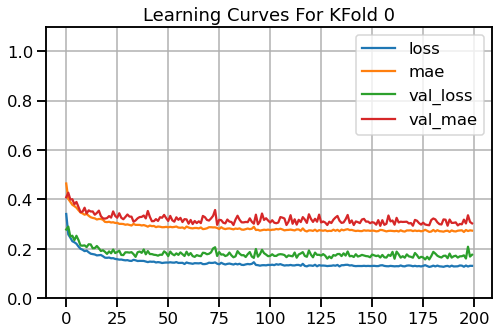

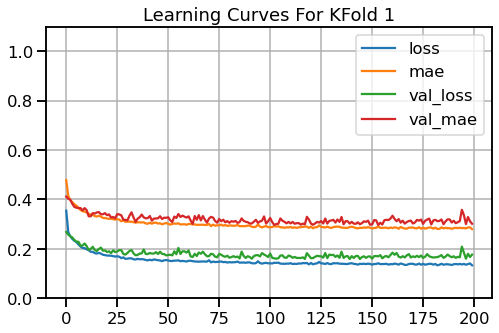

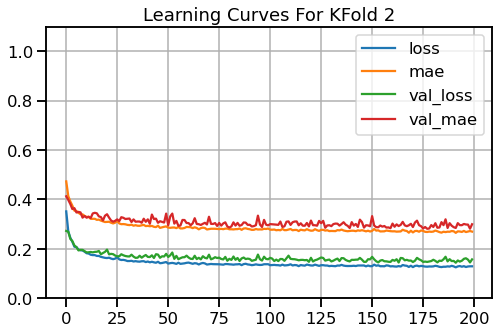

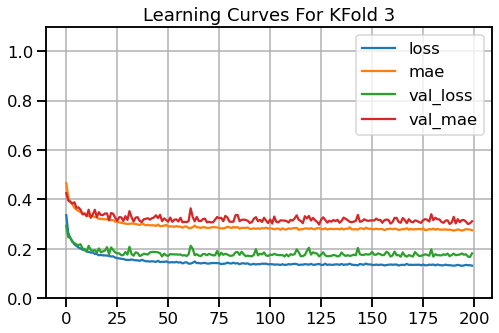

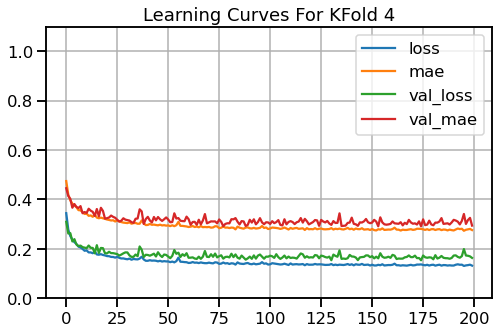

In [131]:
#plot out the learning curve for each K-fold.

for i in range(len(history)):

     pd.DataFrame(history[i].history).plot(figsize=(8, 5))
     plt.title('Learning Curves For KFold '+ str(i))
     plt.grid(True)
     plt.gca().set_ylim(0, 1.1) # set the vertical range to [0-1]
     plt.show()

In [132]:
from sklearn.metrics import r2_score

y_predict=model.predict(X_test)

mse_value, mae_value = model.evaluate(X_test, y_test, verbose=1)

r2_scr=r2_score(y_test, y_predict)  #R2 score should ideally be close to 1.0.

display('MSE:',mse_value, 'MAE:',mae_value,"R2:",r2_scr )

41/41 [==============================] - 0s 444us/step - loss: 0.2809 - mae: 0.4121


'MSE:'

0.28093093633651733

'MAE:'

0.4121420383453369

'R2:'

-0.35614274031173565

## Experiment 4: Classifying Wine Type 

### Set Up Neural Network Model For Predicting Wine Type (that is whether it is red or white wine)

The dataset need to be tweaked to change the target to Type. 

In [54]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


In [55]:
X=wines.drop(['type','quality_class'], axis=1)
y=wines['type']

display(X.head(),y.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

Again we need to scale the data and oversample to deal with imbalanced dataset.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

<AxesSubplot:xlabel='type', ylabel='count'>

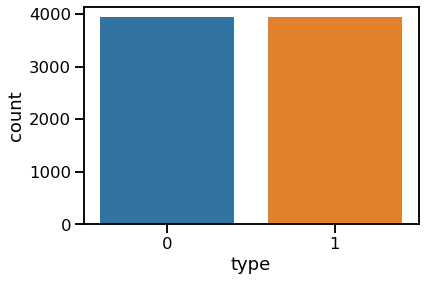

In [58]:
from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.
oversample=SMOTE(random_state=42)
X_smote_train,y_smote_train=oversample.fit_resample(X_train,y_train)

sns.countplot(x=y_smote_train)


#red wine is 1, white wine is 0

In [59]:
%%time 
epoch_set=200
seed = 42
history=[]
m=None

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    model = Sequential()
    model.add(Dense(20, input_dim=12, activation='relu',name='Wine_Quality'),)
    
#    model.add(Dense(20, activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
#     model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid',name='Output'))
    
    
    
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
    m=model
    h=(model.fit(X_smote_train[train,:], y_smote_train[train], 
                 validation_data=(X_smote_train[test,:],y_smote_train[test]), 
                 epochs=epoch_set, verbose=1))
    history.append(h)

Epoch 1/10
197/197 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.9421 - val_loss: 0.2197 - val_accuracy: 0.9708
Epoch 2/10
197/197 [==============================] - 0s 909us/step - loss: 0.1651 - accuracy: 0.9805 - val_loss: 0.1411 - val_accuracy: 0.9784
Epoch 3/10
197/197 [==============================] - 0s 910us/step - loss: 0.1129 - accuracy: 0.9854 - val_loss: 0.1087 - val_accuracy: 0.9816
Epoch 4/10
197/197 [==============================] - 0s 926us/step - loss: 0.0883 - accuracy: 0.9879 - val_loss: 0.0916 - val_accuracy: 0.9841
Epoch 5/10
197/197 [==============================] - 0s 925us/step - loss: 0.0742 - accuracy: 0.9889 - val_loss: 0.0813 - val_accuracy: 0.9841
Epoch 6/10
197/197 [==============================] - 0s 914us/step - loss: 0.0652 - accuracy: 0.9902 - val_loss: 0.0746 - val_accuracy: 0.9848
Epoch 7/10
197/197 [==============================] - 0s 947us/step - loss: 0.0590 - accuracy: 0.9908 - val_loss: 0.0699 - val_accuracy: 0

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Wine_Quality (Dense)         (None, 64)                832       
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


(None, 1)

None

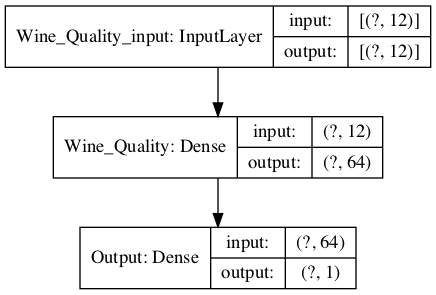

In [60]:
display(model.output_shape, model.summary())

plot_model(m,show_shapes=True)

In [61]:
history[0].history

{'loss': [0.3436661958694458,
  0.1651393175125122,
  0.11291663348674774,
  0.08826002478599548,
  0.0741657167673111,
  0.06518004089593887,
  0.058963898569345474,
  0.05442182347178459,
  0.05096670985221863,
  0.04823561757802963],
 'accuracy': [0.942081868648529,
  0.9804823994636536,
  0.985401451587677,
  0.9879403114318848,
  0.9888924360275269,
  0.9901618361473083,
  0.9907965660095215,
  0.9915899634361267,
  0.9917486310005188,
  0.9919073581695557],
 'val_loss': [0.2197406142950058,
  0.1411319375038147,
  0.10869446396827698,
  0.09157164394855499,
  0.08131087571382523,
  0.07458139955997467,
  0.06990299373865128,
  0.0664529949426651,
  0.06382884830236435,
  0.061776965856552124],
 'val_accuracy': [0.970812201499939,
  0.9784263968467712,
  0.981598973274231,
  0.9841370582580566,
  0.9841370582580566,
  0.9847715497016907,
  0.9854061007499695,
  0.9860405921936035,
  0.9866751432418823,
  0.9866751432418823]}

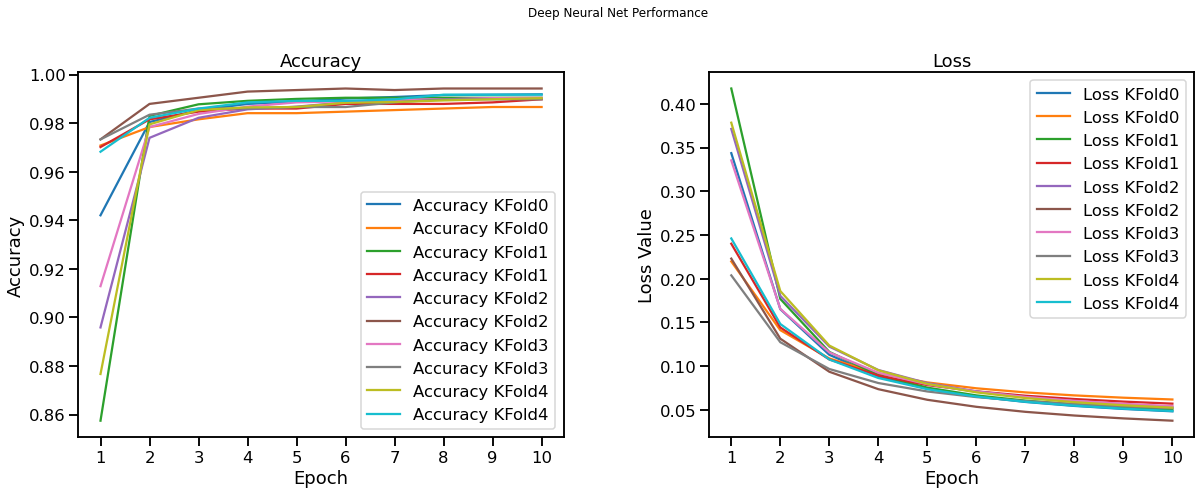

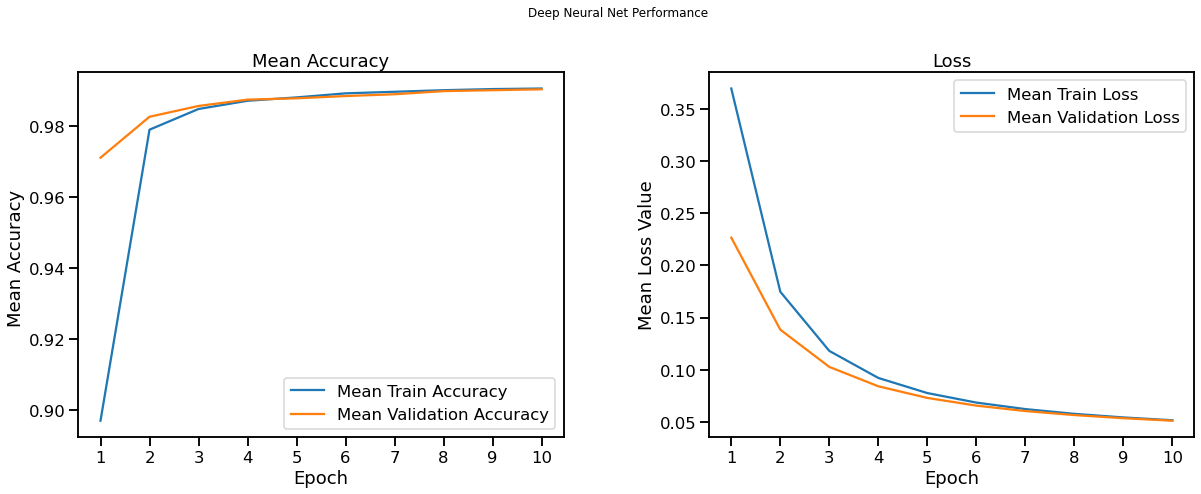

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epoch_set+1))
for i in range(len(history)):
    label="Accuracy KFold"+ str(i)
    ax1.plot(epochs, history[i].history['binary_accuracy'], label=label)
    ax1.plot(epochs, history[i].history['val_binary_accuracy'], label=label)
    ax1.set_xticks(epochs)
    #ax1.set_ylim([0,1])
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")
    
    label="Loss KFold"+ str(i)

    ax2.plot(epochs, history[i].history['loss'], label=label)
    ax2.plot(epochs, history[i].history['val_loss'], label=label)

    #ax2.set_ylim([0,1])
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")
    
    
#The code below attempt to present less clutttered "averge" picture of the training and validation result.

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['binary_accuracy']))
    vsca.append(np.array(history[i].history['val_binary_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
#ax1.set_ylim([0,1])
ax1.set_ylabel('Mean Accuracy ')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
#ax2.set_ylim([0,1])
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

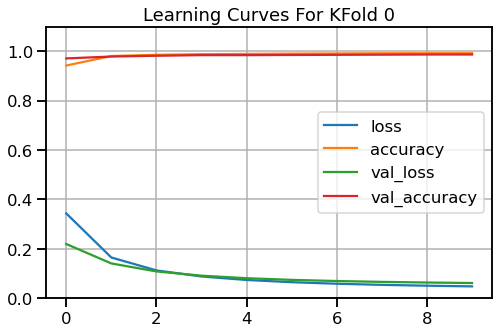

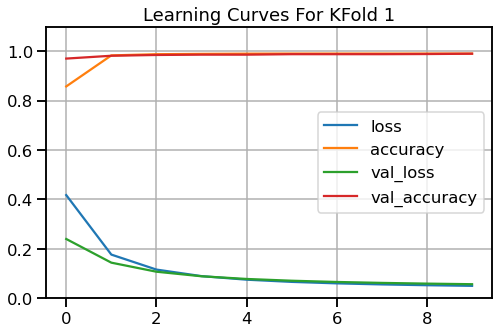

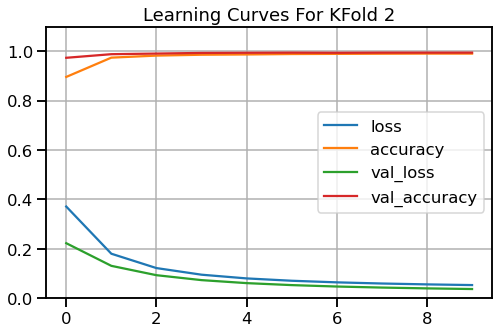

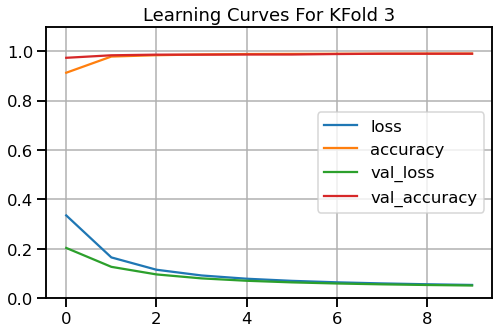

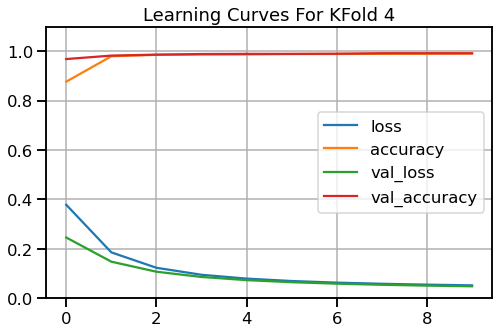

In [63]:
#plot out the learning curve for each K-fold.

for i in range(len(history)):

     pd.DataFrame(history[i].history).plot(figsize=(8, 5))
     plt.title('Learning Curves For KFold '+ str(i))
     plt.grid(True)
     plt.gca().set_ylim(0, 1.1) # set the vertical range to [0-1]
     plt.show()

In [64]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 676us/step - loss: 0.0625 - accuracy: 0.9854


[0.0624789297580719, 0.9853846430778503]

In [65]:
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score,classification_report
y_pred = model.predict(X_test)
print(y_pred.shape,'\n', y_pred[0:5], '\n',y_test[0:5])

(1300, 1) 
 [[0.00998279]
 [0.80586576]
 [0.01226017]
 [0.0048342 ]
 [0.00633234]] 
 3103    0
1419    1
4761    0
4690    0
4032    0
Name: type, dtype: int64


In [66]:
#Convert probabilities to class prediction

y_pred_class=[np.where(i>0.5,1,0) for i in y_pred]

In [67]:
confusion_matrix(y_test, y_pred_class)


array([[946,  13],
       [  6, 335]])

In [68]:
def plot_consfusionmatrix(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['white','red']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 


Confusion Matrxi Of Test Set:


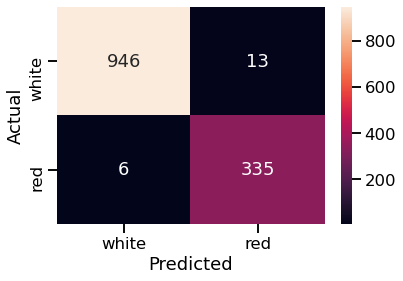

In [69]:
plot_consfusionmatrix(y_test,y_pred_class) 

In [70]:
print(classification_report(y_test,y_pred_class))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.96      0.98      0.97       341

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300

